# Notebook of Results from using Mammen and Polonik's (2013) Method to Draw Confidence Regions for Base Isolines

In [4]:
# load packages
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(tidyverse)
library(data.table)

# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')

## 5/1/2023

### Simulation 1

Running Mammen and Polonik's method to draw confidence regions with the following settings:
+ $500 \times 500$ grid on $[-2,5] \times [-2,5]$
+ $n = 1000, 5000, 10000, 15000, 25000, 50000, 75000, 100000$
+ $\alpha = 0.1, 0.05, 0.01$
+ Empirical survival function
+ $\beta = n^{-1/2}, n^{-1/3}$
+ Draws from bivariate t distribution

**Results:** good coverage for $p=0.01, p=0.05$ (should probably put in binomial confidence intervals for some variance), bad coverage for $p=0.1$

**Possible Remedies:** alter the fineness of the grid for $p=0.1$, since the points are much more dense down there and thus the survival function would be changing a lot more over a smaller space

In [10]:
load_path <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create/bivt/500gticks_-2lb_5ub_rollingwindow/n1000|5000|10000|15000|25000|50000|75000|1e+05_pp0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|beta0.333333333333333.RData'
bivt_res <- readRDS(load_path)
bivt_covrates <- bivt_res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate = mean(covered))
bivt_covrates$n <- as.numeric(bivt_covrates$n)

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


$p = 0.01, \alpha = 0.01, \beta(n) = 1/\sqrt{n}$

In [68]:
bivt_covrates %>% filter(p == 0.01, alpha == 0.01, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)


n      covrate
1   1000 1.000  
2   5000 1.000  
3  10000 1.000  
4  15000 1.000  
5  25000 1.000  
6  50000 0.994  
7  75000 0.992  
8 100000 0.990

$p = 0.01, \alpha = 0.05, \beta(n) = 1/\sqrt{n}$

In [69]:
bivt_covrates %>% filter(p == 0.01, alpha == 0.05, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 1.000  
2   5000 1.000  
3  10000 0.996  
4  15000 0.996  
5  25000 0.994  
6  50000 0.984  
7  75000 0.974  
8 100000 0.968

$p = 0.01, \alpha = 0.1, \beta(n) = 1/\sqrt{n}$

In [70]:
bivt_covrates %>% filter(p == 0.01, alpha == 0.1, beta_func == as.character(1/2)) %>% arrange(n)%>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 1.000  
2   5000 1.000  
3  10000 0.988  
4  15000 0.986  
5  25000 0.984  
6  50000 0.960  
7  75000 0.946  
8 100000 0.936

$p = 0.05, \alpha = 0.01, \beta(n) = 1/\sqrt{n}$

In [71]:
bivt_covrates %>% filter(p == 0.05, alpha == 0.01, beta_func == as.character(1/2)) %>% arrange(n)%>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 0.998  
2   5000 0.996  
3  10000 0.992  
4  15000 0.992  
5  25000 0.996  
6  50000 0.990  
7  75000 0.972  
8 100000 0.988

$p = 0.05, \alpha = 0.05, \beta(n) = 1/\sqrt{n}$

In [72]:
bivt_covrates %>% filter(p == 0.05, alpha == 0.05, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 0.996  
2   5000 0.988  
3  10000 0.970  
4  15000 0.968  
5  25000 0.958  
6  50000 0.942  
7  75000 0.916  
8 100000 0.944

$p = 0.05, \alpha = 0.1, \beta(n) = 1/\sqrt{n}$

In [73]:
bivt_covrates %>% filter(p == 0.05, alpha == 0.1, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 0.992  
2   5000 0.976  
3  10000 0.938  
4  15000 0.940  
5  25000 0.918  
6  50000 0.894  
7  75000 0.860  
8 100000 0.874

$p = 0.1, \alpha = 0.01, \beta(n) = 1/\sqrt{n}$

In [74]:
bivt_covrates %>% filter(p == 0.1, alpha == 0.01, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 1.000  
2   5000 0.990  
3  10000 0.994  
4  15000 0.990  
5  25000 0.988  
6  50000 0.986  
7  75000 0.972  
8 100000 0.970

$p = 0.1, \alpha = 0.05, \beta(n) = 1/\sqrt{n}$

In [75]:
bivt_covrates %>% filter(p == 0.1, alpha == 0.05, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 0.992  
2   5000 0.970  
3  10000 0.974  
4  15000 0.954  
5  25000 0.954  
6  50000 0.938  
7  75000 0.898  
8 100000 0.896

$p = 0.1, \alpha = 0.1, \beta(n) = 1/\sqrt{n}$

In [76]:
bivt_covrates %>% filter(p == 0.1, alpha == 0.1, beta_func == as.character(1/2)) %>% arrange(n) %>% ungroup() %>% dplyr::select(n, covrate)

n      covrate
1   1000 0.972  
2   5000 0.940  
3  10000 0.946  
4  15000 0.914  
5  25000 0.890  
6  50000 0.858  
7  75000 0.822  
8 100000 0.814

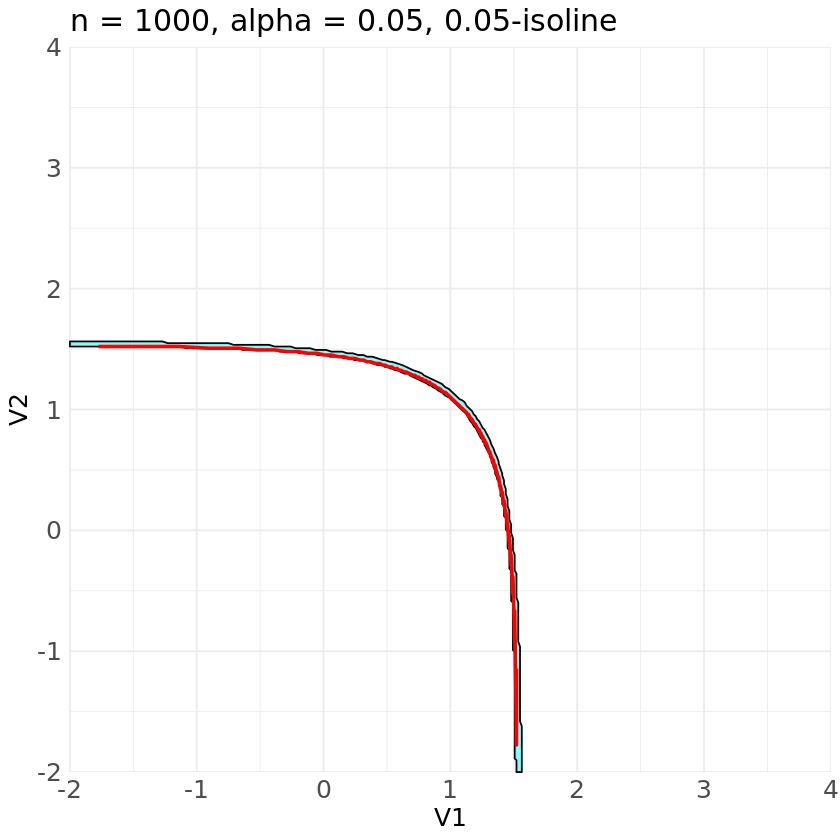

In [34]:
confregpath <- '/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create/bivt/500gticks_-2lb_5ub_rollingwindow/1e+05n_500B_500gticks_-2lb_5ub_bivt_empirical/simulation_1.RData'
confreg <- readRDS(confregpath)

ind <- 10

isopoly <- concaveman(as.matrix(setdiff(confreg[[ind]]$Cu, confreg[[ind]]$Cl)), length_threshold=0.05)
ggplot() + #geom_point(data=confreg[[ind]]$dat, aes(x=X1, y=X2), alpha = 0.1) + 
geom_polygon(data=data.frame(isopoly), aes(x=V1, y=V2), fill = 'cyan', color = 'black', alpha = 0.5) + 
geom_line(data=isolines[['0.1']]$isoline, aes(x=X1, y=X2), color='red', size=1) + scale_x_continuous(limits=c(-2, 4), expand=c(0,0)) +
scale_y_continuous(limits=c(-2, 4), expand=c(0,0)) + theme_minimal() + ggtitle('n = 1000, alpha = 0.05, 0.05-isoline') +  theme_minimal() + theme(
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      text = element_text(size = 15))

### Simulation 2

Experimenting with using interpolation methods (`contourLines` function in `R`) to get the requisite level sets and then define a cover as we discussed with Jon (all points on each line has none up and to the left, etc.)

+ $500 \times 500$ grid on $[-2,5] \times [-2,5]$
+ $n = 1000, 5000, 10000, 15000, 25000, 50000, 75000, 100000$
+ $p = 0.1, 0.05, 0.01$
+ $\alpha = 0.1, 0.05, 0.01$
+ Empirical survival function
+ $\beta = n^{-1/2}, n^{-1/3}$
+ Draws from bivariate t distribution

**Results:** Doesn't seem like the coverage is much better, in fact a lot worse. Maybe should avoid using this method anyway bc you don't know what interpolation method they are using..

In [58]:
ps <- c(0.1, 0.05, 0.01)
tols <- c(0.0005, 0.0003, 0.00012)

isoline <- contourLines(x = seq(lb, ub, length.out = gticks),
                        y = seq(lb, ub, length.out = gticks),
                        z = matrix(true_surv, ncol=gticks),
                        levels = c(0.1))
isoline <- data.frame(X=isoline[[1]]$y, Y=isoline[[1]]$x)

In [24]:
path <- '/global/cscratch1/sd/jbbutler/sims/regions/contourconfregs/bivt/res_500gticks_-2lb_5ub_rollingwindow/n1e+05_pp0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|beta0.333333333333333.RData'
res <- readRDS(path)

res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate = mean(covered)) %>% filter(p==0.1, beta_func==as.character(1/2))

#res %>% groupby(p, alpha, n, beta)


`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


n     alpha p   beta_func covrate
1 1e+05 0.01  0.1 0.5       0.984  
2 1e+05 0.05  0.1 0.5       0.922  
3 1e+05 0.10  0.1 0.5       0.840

### Simulation 3

Now trying to see if, upon making the grid denser near where the $p=0.1$ isoline is, if the coverage rate changes than with the original grid (so you know there is some effect of the density of the grid on the coverage with higher sample sizes..)

+ $500 \times 500$ grid on $[-2,2] \times [-2,2]$
+ $n = 100000$
+ $p = 0.1$
+ $\alpha = 0.1, 0.05, 0.01$
+ Empirical survival function
+ $\beta = n^{-1/2}, n^{-1/3}$
+ Draws from bivariate t distribution

**Results:** Seems like the coverage is actually a lot better, even with this super high value of $n$..

In [20]:
path <- '/global/cscratch1/sd/jbbutler/sims/regions/contourconfregs/bivt/res_500gticks_-2lb_2ub_rollingwindow/n1e+05_pp0.1_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|beta0.333333333333333.RData'
res <- readRDS(path)

In [21]:
res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate = mean(covered)) %>% filter(p==0.1, beta_func==as.character(1/2))

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


n     alpha p   beta_func covrate
1 1e+05 0.01  0.1 0.5       0.998  
2 1e+05 0.05  0.1 0.5       0.958  
3 1e+05 0.10  0.1 0.5       0.914

## 5/5/2023 - 5/10/2023

### Experimenting with a Way to Draw Level Sets of Bivariate Survival Functions

It's clear that if we make the grid more fine, the undercoverage issue disappears. But, notice that the survival function is actually a step function with step-changes at each data point observed. So, you should be able to draw these level sets of interest at the most precise scale possible (since the boundaries of the regions are just line segments connected to each other). Thus, you can also parametrize the bounding curves to infinite precision! Today, I'm trying to implement a smarter way to do this and hopefully get something good and efficient!

In [132]:
## generate data and provide input number of exceedances you wish to go for
n <- 1000
dat <- data.frame(rmvt(n, sigma=matrix(c(1, 0.7, 0.7, 1), nrow=2), df=4))
exceedances <- 100
lb <- -2
ub <- 5

Visualization showing the finished product: a bounding curve of some isoline's confidence region, with the right amount of exceedances

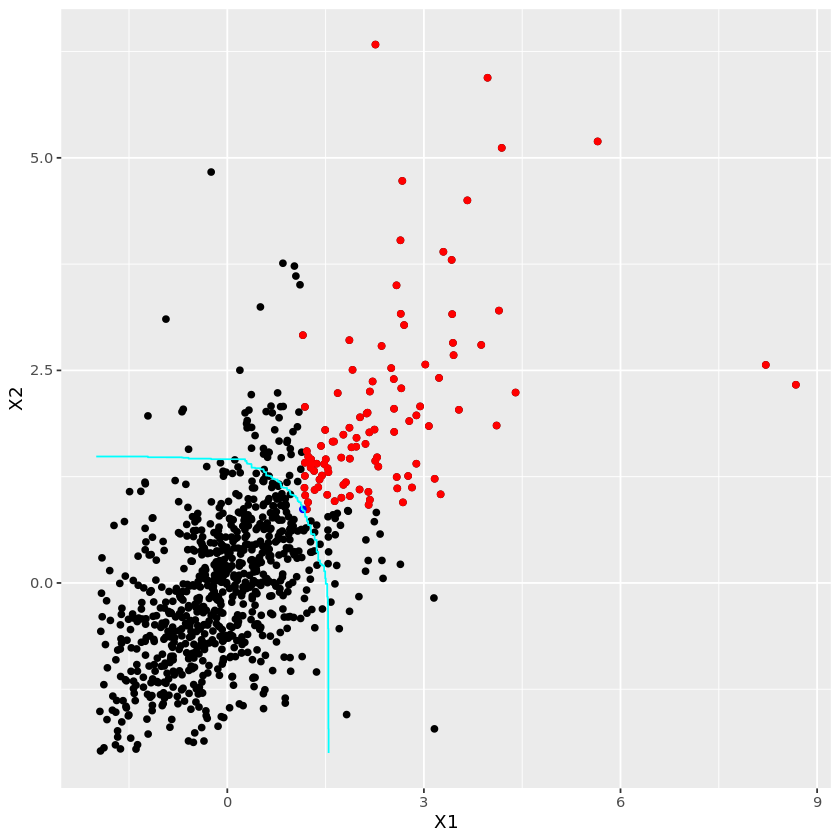

In [134]:
ind <- 100
alpha <- 1

ggplot() + geom_point(data=subdat, aes(x=X1, y=X2), alpha=alpha) + 
geom_point(data=subdat %>% filter(X1 >= points_x[ind], X2 >= points_y[ind]), aes(x=X1, y=X2), color='red', alpha=alpha) + 
geom_point(data=data.frame(X1=points_x, X2=points_y)[ind,], aes(x=X1, y=X2), color='blue') + 
geom_line(data=data.frame(X1=points_x, X2=points_y), aes(x=X1, y=X2), color='cyan')


Finally did it! Uses a `while` loop to find all the coordinates and uses the `data.table` package to do fast computations and subsetting. I think at sample sizes of $n=100000$ it takes quite a bit of time to do (but only about 20-30 seconds to draw each curve, but I'm done with it lol so let's just stop!)

## 5/11/2023

Now, let's test out our new method for drawing these confidence regions!

In [43]:
lb <- -2
ub <- 5

gticks <- 500
n <- 1000
B <- 100
alphas <- c(0.1, 0.05, 0.01)
ps <- c(0.1, 0.05, 0.01)

beta_funcs_dict <- list()
beta_funcs_dict[[as.character(1/3)]] <- function(n) {return((1/n)^(1/3))}
beta_funcs_dict[[as.character(1/2)]] <- function(n) {return((1/n)^(1/2))}

grid <- expand.grid(X1 = seq(lb, ub, length.out = gticks),
                    X2 = seq(lb, ub, length.out = gticks))

In [44]:
dat <- data.frame(rmvt(n, sigma = matrix(c(1, 0.7, 0.7, 1), nrow = 2), df = 4))

In [45]:
source('~/isolines_uq/scripts/R/confidence_regions_procedure/confidenceRegions.R')
base_out <- drawBaseRegions(dat=dat, grid=grid, lb=lb, ub=ub,
                                beta_funcs_dict=beta_funcs_dict, alphas=alphas, ps=ps, B=B)

Warning message in ys[1] <- y_ordered[exceedances]:
“number of items to replace is not a multiple of replacement length”


Warning message:
“Removed 95 rows containing missing values (geom_point).”


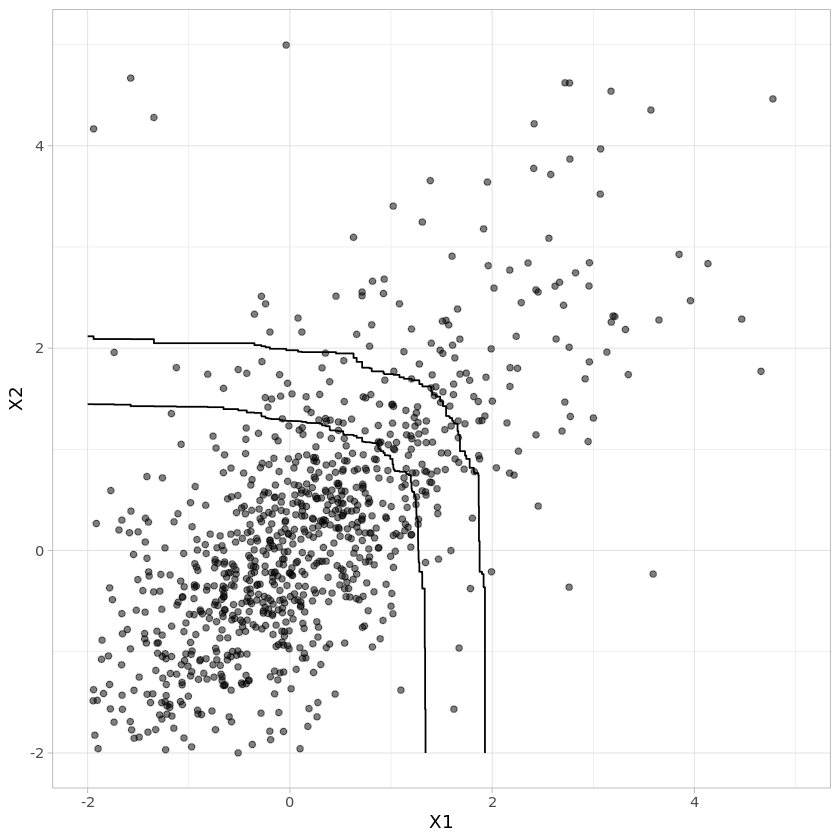

In [28]:
ggplot() + geom_point(data=dat, aes(x=X1, y=X2), alpha=0.5) + 
geom_line(data=base_out[[1]]$tube_bottom, aes(x=X1, y=X2)) + 
geom_line(data=base_out[[1]]$tube_top, aes(x=X1, y=X2)) + 
ylim(c(lb, ub)) + xlim(c(lb, ub)) + theme_light()

Hooray it works! Now I can start running!

## 5/12/23

Warning message:
“Removed 353 rows containing missing values (geom_point).”
Warning message:
“Removed 129 row(s) containing missing values (geom_path).”
Warning message:
“Removed 195 row(s) containing missing values (geom_path).”


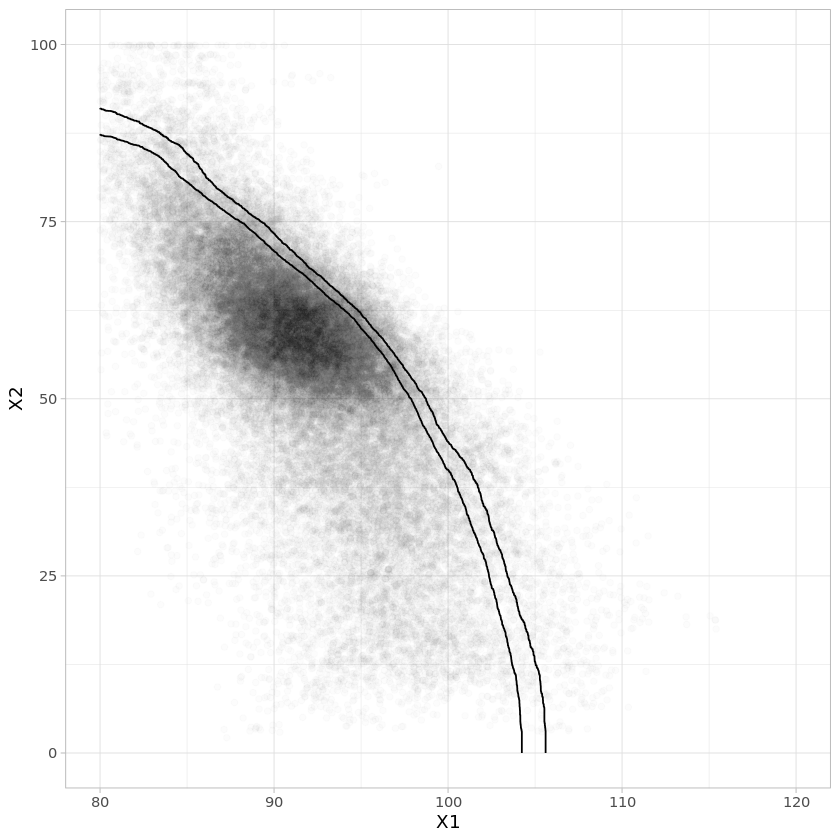

In [166]:
ggplot() + geom_point(data=confregs[[4]]$data, aes(x=X1, y=X2), alpha=0.01) + 
geom_line(data=confregs[[4]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[4]][[2]], aes(x=X1, y=X2)) +
#geom_point(data=iso_df, aes(x=Temperature, y=Humidity), color='red') +
xlim(c(80,120)) + ylim(c(0,100)) +
theme_light()

In [46]:
numCoords <- 100
gridUbs <- c(3, 3)
gridLbs <- c(-1, -1)
prob <- 0.01
pmvnormFixedCoord <- function(radius, angle, sigma, mean, prob, xCenter, yCenter) {
        xCoord <- xCenter + radius*cos(angle)
        yCoord <- yCenter + radius*sin(angle)
        exceedanceProb <- pmvnorm(lower=c(xCoord, yCoord), upper=c(Inf, Inf), mean=mean, sigma=sigma)
        return(exceedanceProb - prob)
}

radii <- rep(NA, numCoords)
angles <- seq(0, pi/2, length.out=numCoords)
maxRad <- max(gridUbs - gridLbs)

# for each angle in first quadrant, find radius that gives a point with desired exceedance probability
# by finding roots of pmvtFixedCoord given the angle
for (i in 1:numCoords) {
    angle <- angles[i]
    radii[i] <- uniroot(pmvnormFixedCoord, interval=c(0, maxRad), angle=angle, mean=rep(0,2),
                             sigma=matrix(c(1, 0.7, 0.7, 1), nrow=2), prob=prob, xCenter=gridLbs[1], yCenter=gridLbs[2])$root
}

# convert back to cartesian coordinates
xs <- radii*cos(angles) + gridLbs[1]
ys <- radii*sin(angles) + gridLbs[2]

ERROR: Error in uniroot(pmvnormFixedCoord, interval = c(0, maxRad), angle = angle, : f() values at end points not of opposite sign


## 5/17/23

Looking at the simulation results for bivariate t, bivariate gaussian, and karachi data distribution cases. I'm so nervous!! But what's new with these simulations:

+ the edges of the curves are exact, no more coverage issues with the regions being drawn on too coarse grids..
+ the isolines are also mostly exact! no more issues with the points on the isolines not being exact but within some tolerance of the true coverage (which was super ad hoc and could affect coverage results!)

### Bivariate t Results

In [2]:
# loading the dataframe of results
bivt_path <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/n1000|5000|10000|25000|50000|1e+05_pp0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|betasqrt(log(n)_div_n).RData'
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

In [3]:
bivt_res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate=mean(covered)) %>% filter(p==0.1,alpha==0.1)

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


n      alpha p   beta_func covrate
1   1000 0.1   0.1 0.5       0.966  
2   5000 0.1   0.1 0.5       0.960  
3  10000 0.1   0.1 0.5       0.928  
4  25000 0.1   0.1 0.5       0.944  
5  50000 0.1   0.1 0.5       0.930  
6 100000 0.1   0.1 0.5       0.922

In [4]:
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.1)

In [5]:
ind <- 3
path <- paste0('/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/25000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)

In [82]:
names(confregs)

[1] "beta0.5_p0.01_alpha0.01"            "beta0.5_p0.01_alpha0.05"           
 [3] "beta0.5_p0.01_alpha0.1"             "betasqrt(log(n)/n)_p0.01_alpha0.01"
 [5] "betasqrt(log(n)/n)_p0.01_alpha0.05" "betasqrt(log(n)/n)_p0.01_alpha0.1" 
 [7] "beta0.5_p0.05_alpha0.01"            "beta0.5_p0.05_alpha0.05"           
 [9] "beta0.5_p0.05_alpha0.1"             "betasqrt(log(n)/n)_p0.05_alpha0.01"
[11] "betasqrt(log(n)/n)_p0.05_alpha0.05" "betasqrt(log(n)/n)_p0.05_alpha0.1" 
[13] "beta0.5_p0.1_alpha0.01"             "beta0.5_p0.1_alpha0.05"            
[15] "beta0.5_p0.1_alpha0.1"              "betasqrt(log(n)/n)_p0.1_alpha0.01" 
[17] "betasqrt(log(n)/n)_p0.1_alpha0.05"  "betasqrt(log(n)/n)_p0.1_alpha0.1"

Warning message:
“Removed 4269 rows containing missing values (geom_point).”


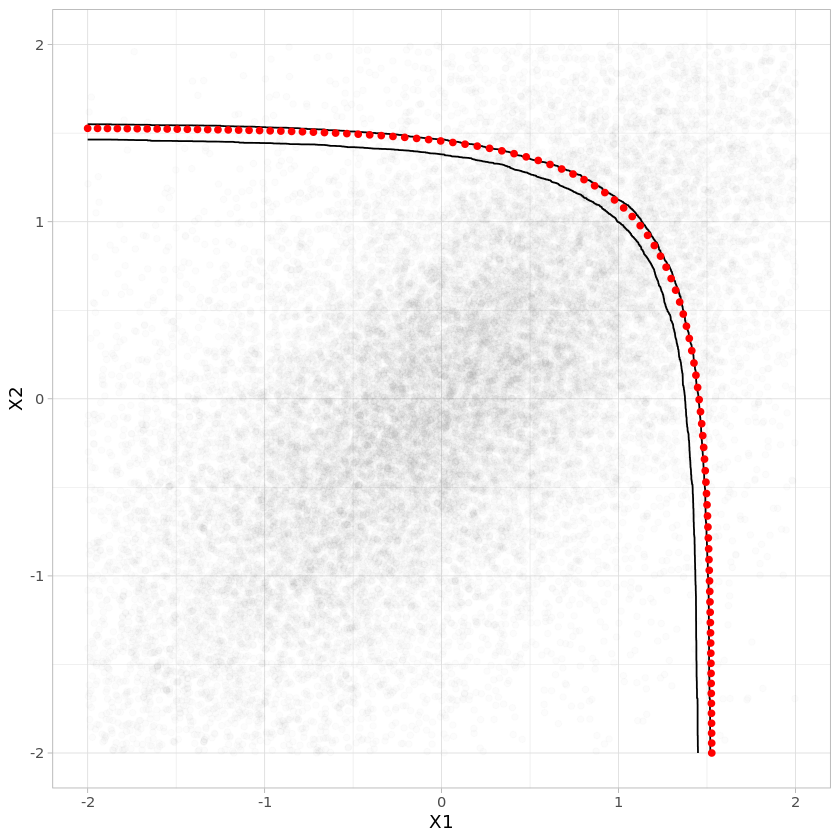

In [91]:
ggplot() + geom_point(data=confregs[[15]]$data, aes(x=X1, y=X2), alpha=0.01) + 
geom_line(data=confregs[[15]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[15]][[2]], aes(x=X1, y=X2)) +
geom_point(data=isoline, aes(x=X1, y=X2), color='red') +
xlim(c(-2,2)) + ylim(c(-2,2)) +
theme_light()

### Bivariate Gaussian Results

In [153]:
# loading the dataframe of results
bivgauss_path <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/n1000|5000|10000|25000|50000|1e+05_pp0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|betasqrt(log(n)_div_n).RData'
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivt_res$n)

In [166]:
bivgauss_res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate=mean(covered)) %>% filter(p==0.05,alpha==0.1)

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


n      alpha p    beta_func covrate
1   1000 0.1   0.05 0.5       0.986  
2   5000 0.1   0.05 0.5       0.982  
3  10000 0.1   0.05 0.5       0.964  
4  25000 0.1   0.05 0.5       0.944  
5  50000 0.1   0.05 0.5       0.936  
6 100000 0.1   0.05 0.5       0.948

### Karachi Results

In [168]:
# loading the dataframe of results
karachi_path <- '/global/cscratch1/sd/jbbutler/sims/regions/base_coverage_create_tubes/karachi/400x400_on_[50,140]x[0,100]/n1000|5000|10000|25000|50000_pp0.1|p0.05|p0.01_alphaalpha0.05|alpha0.1|alpha0.01_beta_funcbeta0.5|betasqrt(log(n)_div_n).RData'
karachi_res <- readRDS(karachi_path)
karachi_res$n <- as.integer(karachi_res$n)

In [175]:
karachi_res %>% group_by(n, alpha, p, beta_func) %>% summarize(covrate=mean(covered)) %>% filter(p==0.1,alpha==0.1)

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


n     alpha p   beta_func covrate
1  1000 0.1   0.1 0.5       0.984  
2  5000 0.1   0.1 0.5       0.940  
3 10000 0.1   0.1 0.5       0.952  
4 25000 0.1   0.1 0.5       0.942  
5 50000 0.1   0.1 0.5       0.946

Conclusion: seems like there's some overcovering, but we're only using 100 points to represent our isolines (in a smaller subset of $\mathbb{R}^{2}$), so the coverage should be at most this amount.. Let's just increase the number of points in the isolines to get more accurate isolines. Also, I noticed that at least in one case (for one combo of n,p,alpha), 3 regions that did cover before now no longer covered with more points, so it's nontrivial it seems.

## 5/18/23

We got results y'all! I'm using 500 points on each isoline since I found a way to do efficient cross joins using the `data.table` package. See results below.

### Bivariate t

In [5]:
# loading the dataframe of results
bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

res <- bivt_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [33]:
res %>% filter(alpha == 0.05)

n      alpha p    beta_func covrate uncertainty
1    1000 0.05  0.01 0.5       1.000   0.000      
2    1000 0.05  0.05 0.5       0.996   0.006      
3    1000 0.05  0.10 0.5       0.976   0.013      
4    5000 0.05  0.01 0.5       0.998   0.004      
5    5000 0.05  0.05 0.5       0.986   0.010      
6    5000 0.05  0.10 0.5       0.982   0.012      
7   10000 0.05  0.01 0.5       0.996   0.006      
8   10000 0.05  0.05 0.5       0.988   0.010      
9   10000 0.05  0.10 0.5       0.956   0.018      
10  25000 0.05  0.01 0.5       0.996   0.006      
11  25000 0.05  0.05 0.5       0.966   0.016      
12  25000 0.05  0.10 0.5       0.958   0.018      
13  50000 0.05  0.01 0.5       0.992   0.008      
14  50000 0.05  0.05 0.5       0.968   0.015      
15  50000 0.05  0.10 0.5       0.958   0.018      
16 100000 0.05  0.01 0.5       0.990   0.009      
17 100000 0.05  0.05 0.5       0.960   0.017      
18 100000 0.05  0.10 0.5       0.956   0.018

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


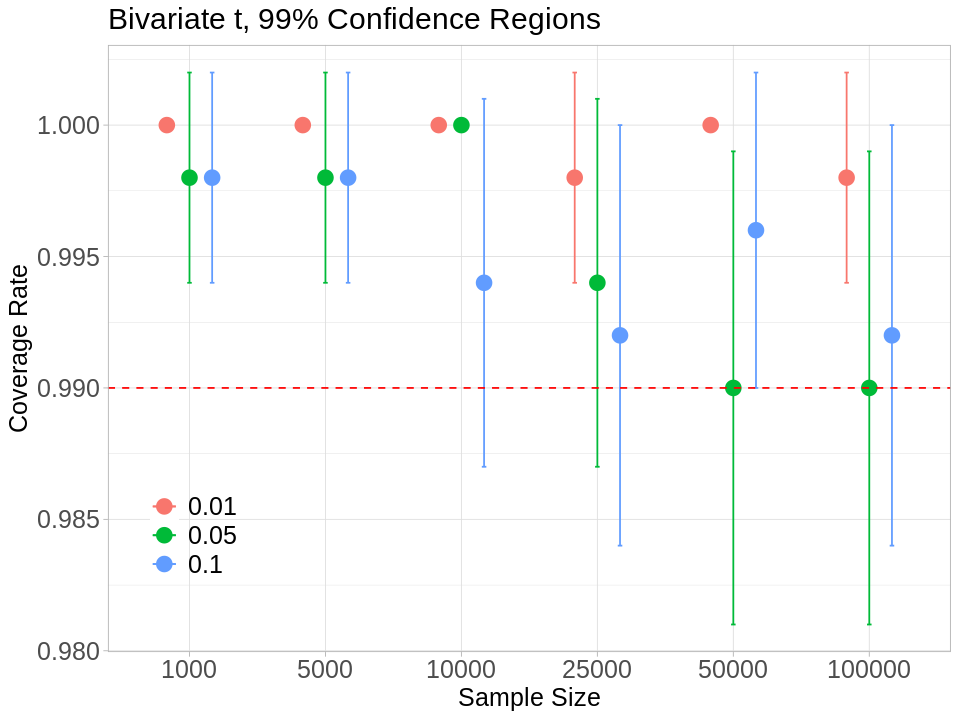

In [6]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [27]:
ind <- 110
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/5000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.05)

Warning message:
“Removed 464 rows containing missing values (`geom_point()`).”


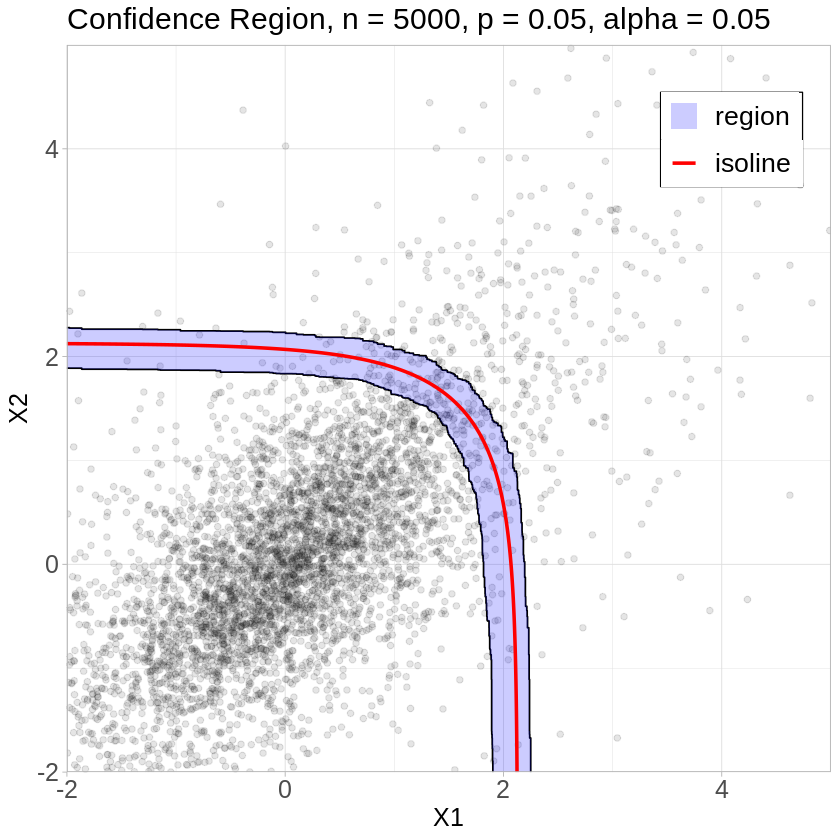

In [28]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


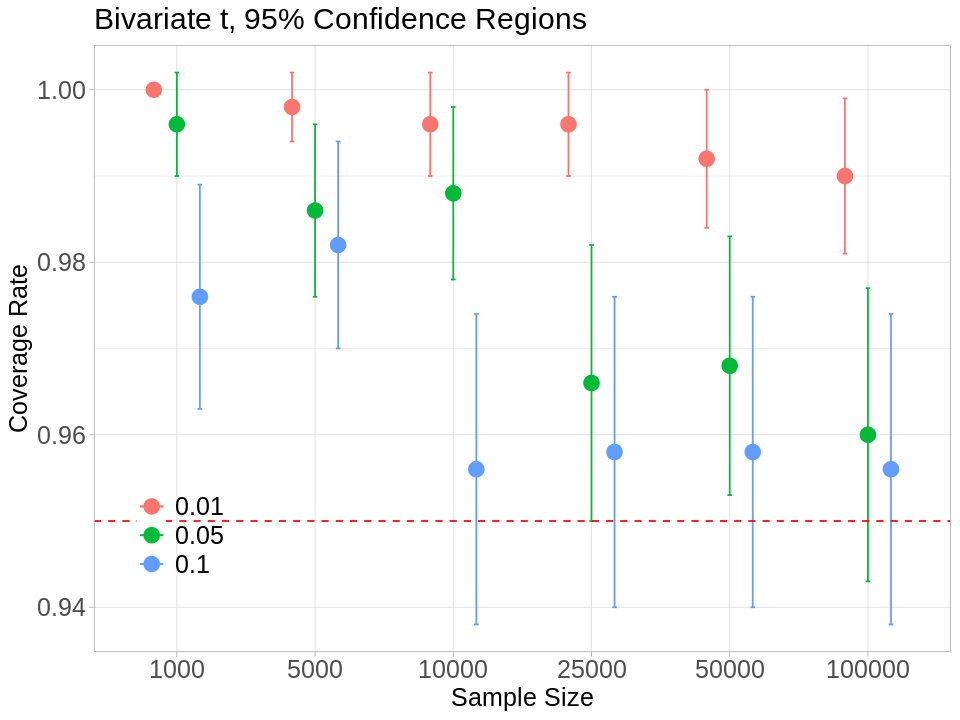

In [32]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05 
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


In [3]:
ind <- 20
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/10000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.05)

ERROR: Error in paste0(perlpath, "/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/10000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_", : object 'perlpath' not found


Warning message:
“Removed 857 rows containing missing values (geom_point).”


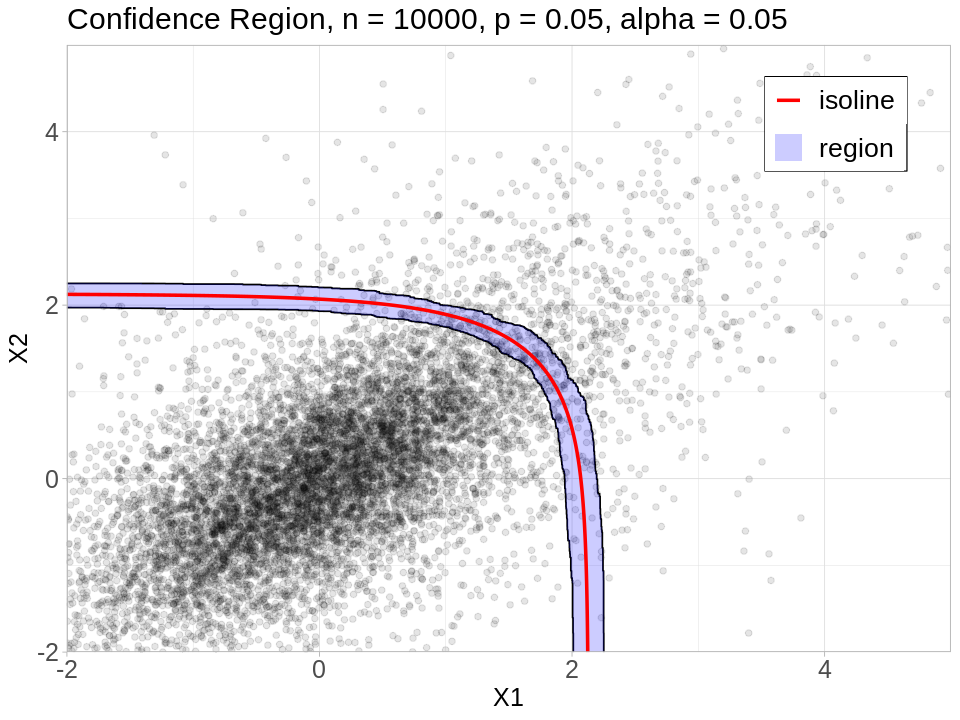

In [22]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [4]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


ERROR: Error in ggplot(res %>% filter(alpha == a), aes(color = as.factor(p))): could not find function "ggplot"


In [24]:
ind <- 20
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/25000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.01_alpha0.1'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(5,5), gridLbs=c(-2,-2), prob=0.01)

Warning message:
“Removed 2314 rows containing missing values (geom_point).”


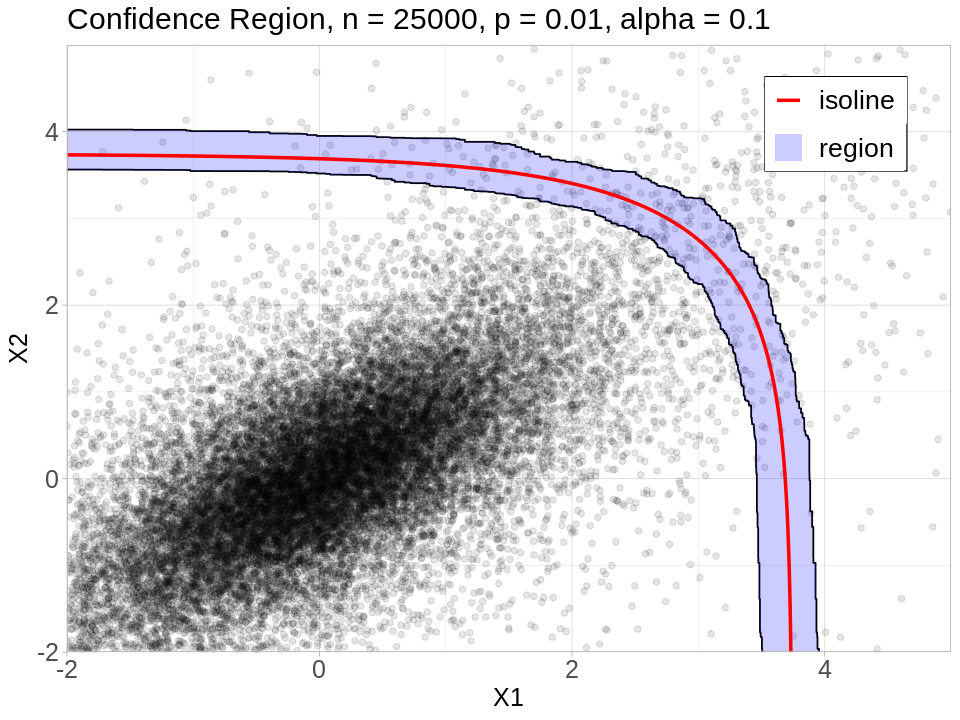

In [25]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,5), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

### Bivariate Gaussian

In [26]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



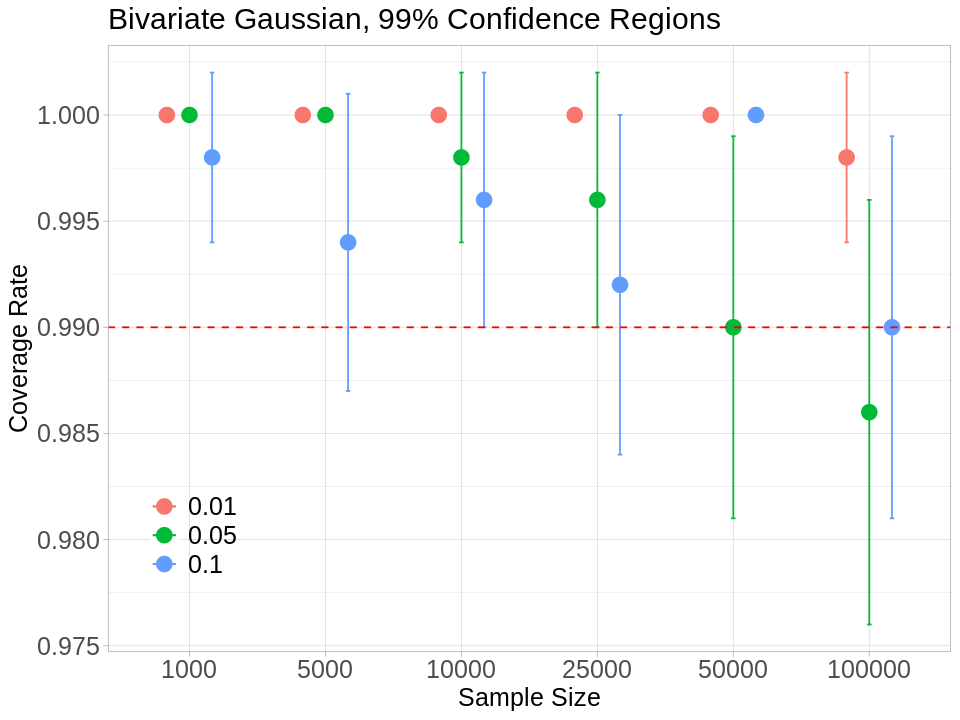

In [27]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [28]:
ind <- 20
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/1000n_500B_400x400_on_[-1,3]x[-1,3]/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.01'
isoline <- drawBivGaussIsoline(numCoords=500, gridUbs=c(3,3), gridLbs=c(-1,-1), prob=0.05)

Warning message:
“Removed 243 rows containing missing values (geom_point).”


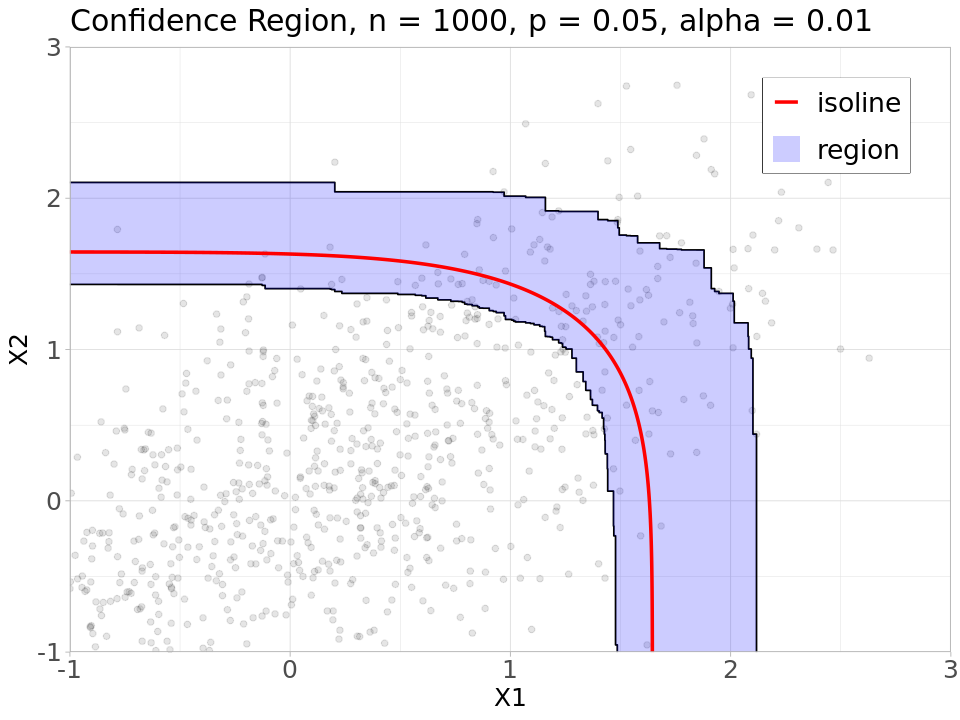

In [263]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_y_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



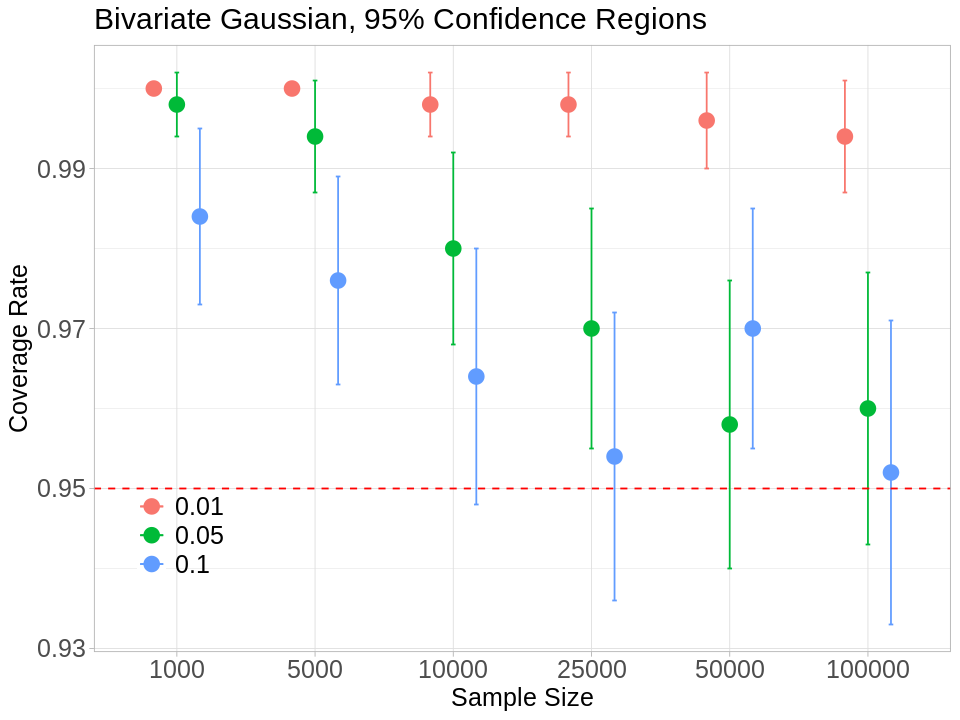

In [29]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [30]:
ind <- 20
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/5000n_500B_400x400_on_[-1,3]x[-1,3]/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.1_alpha0.05'
isoline <- drawBivGaussIsoline(numCoords=500, gridUbs=c(3,3), gridLbs=c(-1,-1), prob=0.1)

Warning message:
“Removed 1209 rows containing missing values (geom_point).”


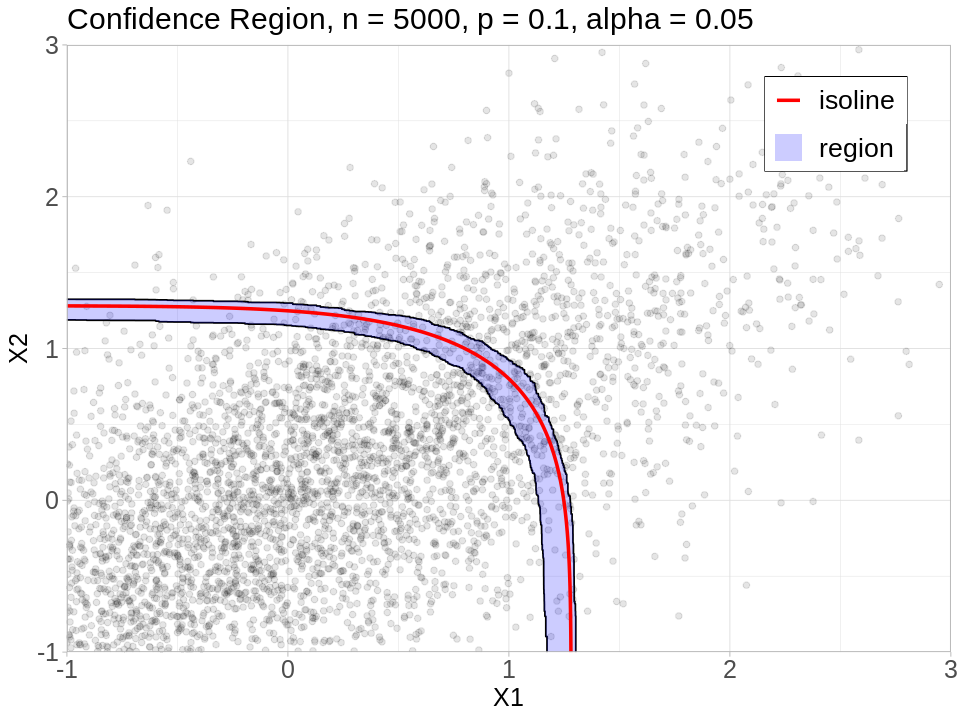

In [31]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_y_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



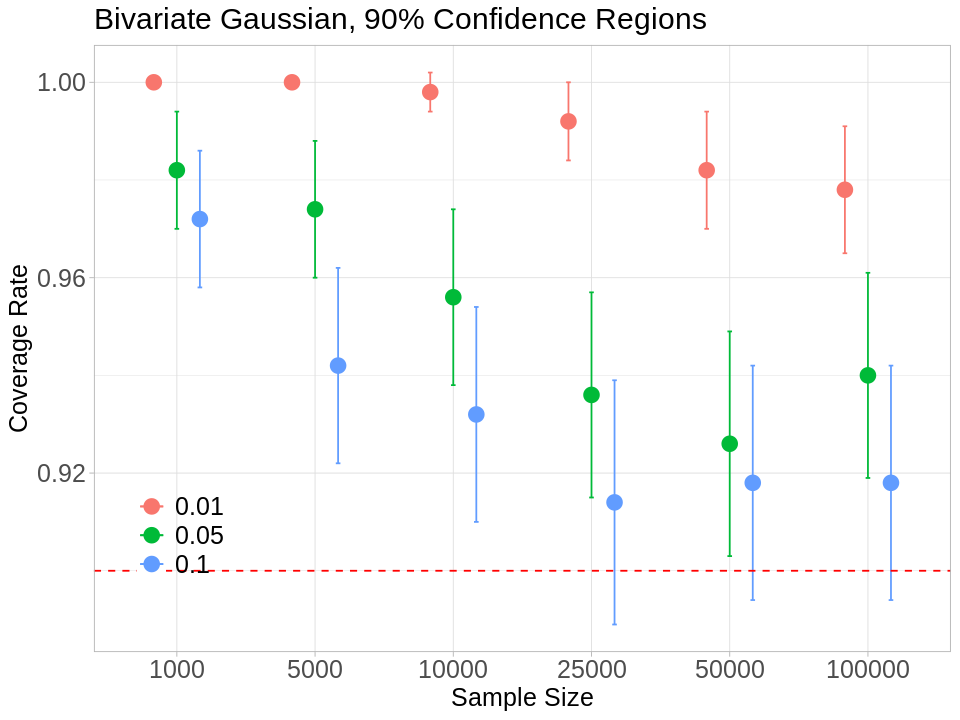

In [33]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [426]:
ind <- 10
path <- paste0('/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create_tubes/bivgauss/400x400_on_[-1,3]x[-1,3]/50000n_500B_400x400_on_[-1,3]x[-1,3]/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.01_alpha0.1'
isoline <- drawBivGaussIsoline(numCoords=500, gridUbs=c(3,3), gridLbs=c(-1,-1), prob=0.01)

Warning message:
“Removed 11746 rows containing missing values (geom_point).”


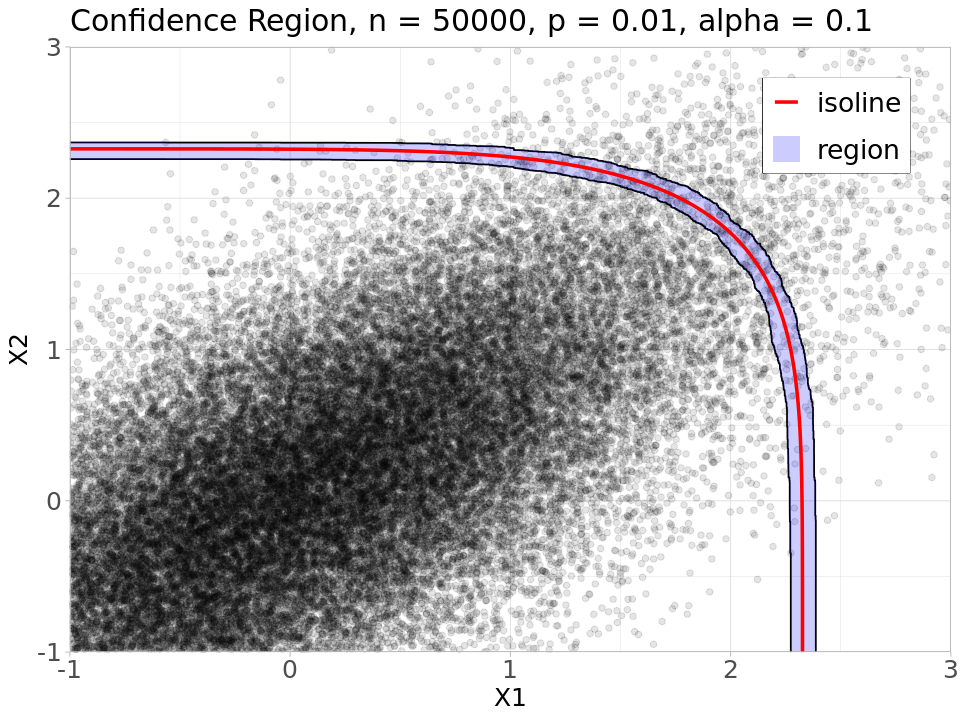

In [294]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.1) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_y_continuous(limits = c(-1,3), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

### Karachi

In [34]:
# loading the dataframe of results
bivkarachi_path <- paste0(perlpath, '/sims/regions/base_coverage_create_tubes/karachi/400x400_on_[50,140]x[0,100]/isolinenumCoords_500.RData')
bivkarachi_res <- readRDS(bivkarachi_path)
bivkarachi_res$n <- as.integer(bivkarachi_res$n)

res <- bivkarachi_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



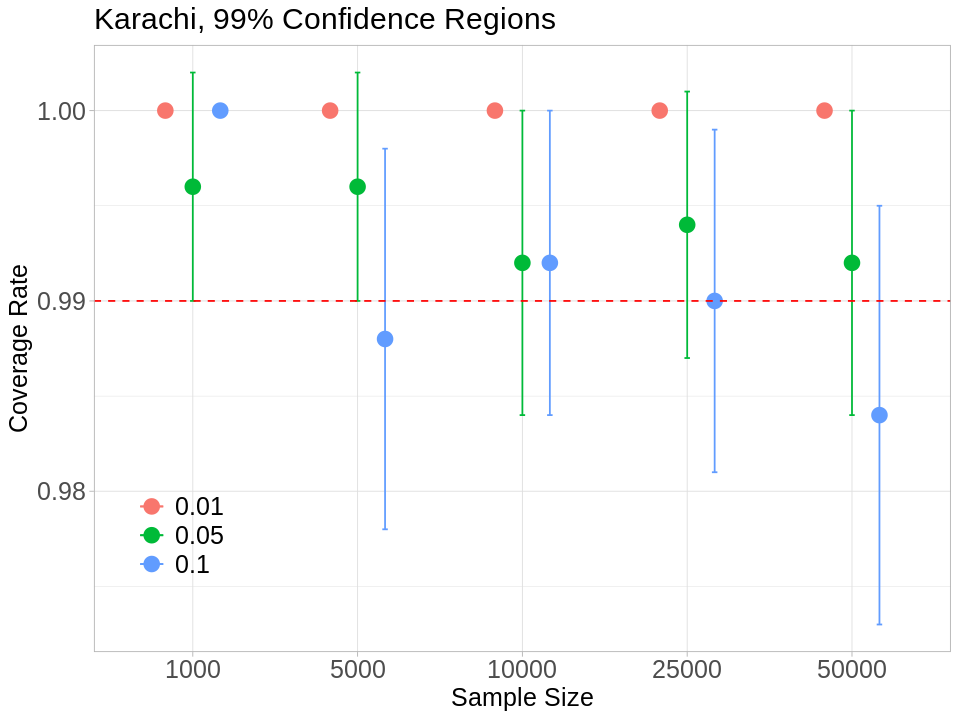

In [35]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [36]:
ind <- 10
path <- paste0(perlpath, '/sims/regions/base_confregs_create_tubes/karachi/400x400_on_[50,140]x[0,100]/10000n_500B_400x400_on_[50,140]x[0,100]_karachi_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.01_alpha0.01'
isoline <- drawKarachiIsoline(numCoords=100, gridUbs=c(140,100), gridLbs=c(50,0), prob=0.01)

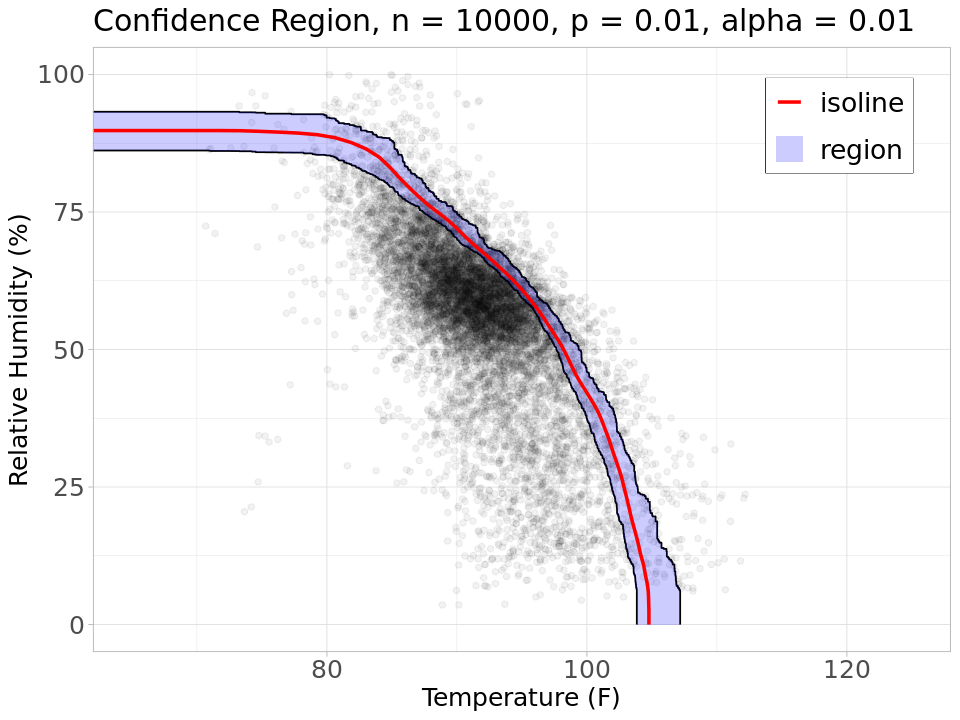

In [287]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
coord_cartesian(ylim=c(0, 100), xlim = c(65, 125)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



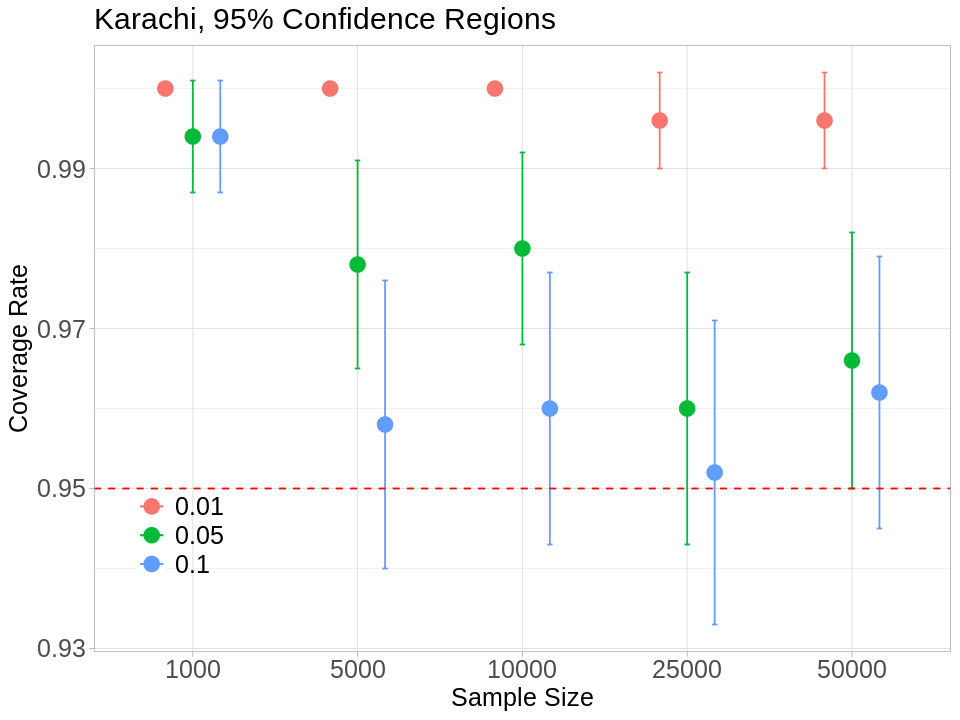

In [37]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [295]:
ind <- 100
path <- paste0('/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create_tubes/karachi/400x400_on_[50,140]x[0,100]/5000n_500B_400x400_on_[50,140]x[0,100]_karachi_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.05'
isoline <- drawKarachiIsoline(numCoords=100, gridUbs=c(140,100), gridLbs=c(50,0), prob=0.05)

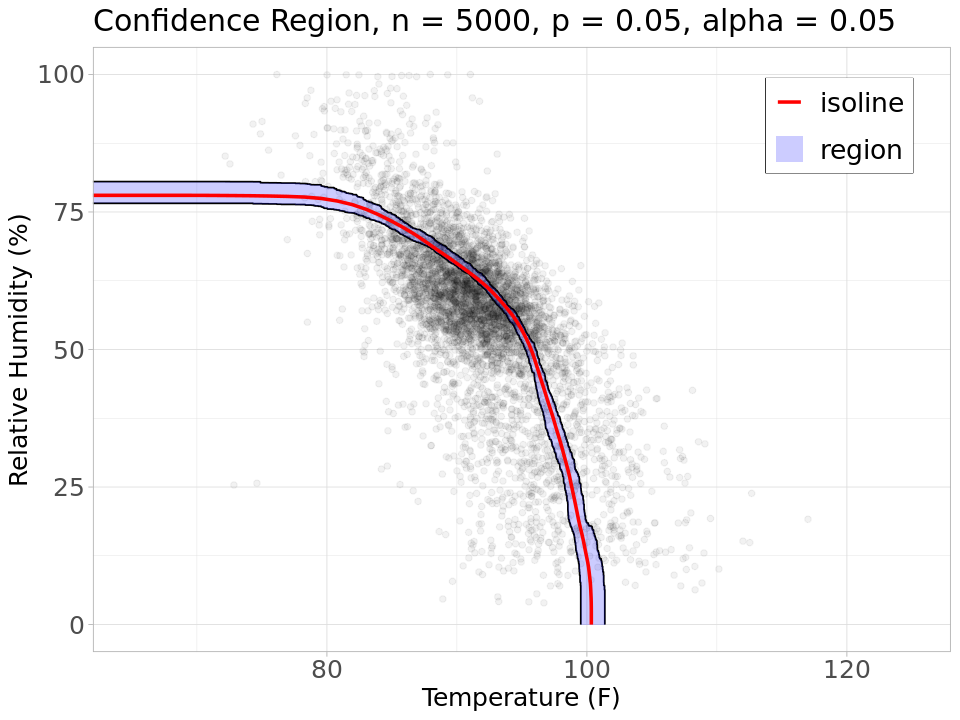

In [296]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
coord_cartesian(ylim=c(0, 100), xlim = c(65, 125)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



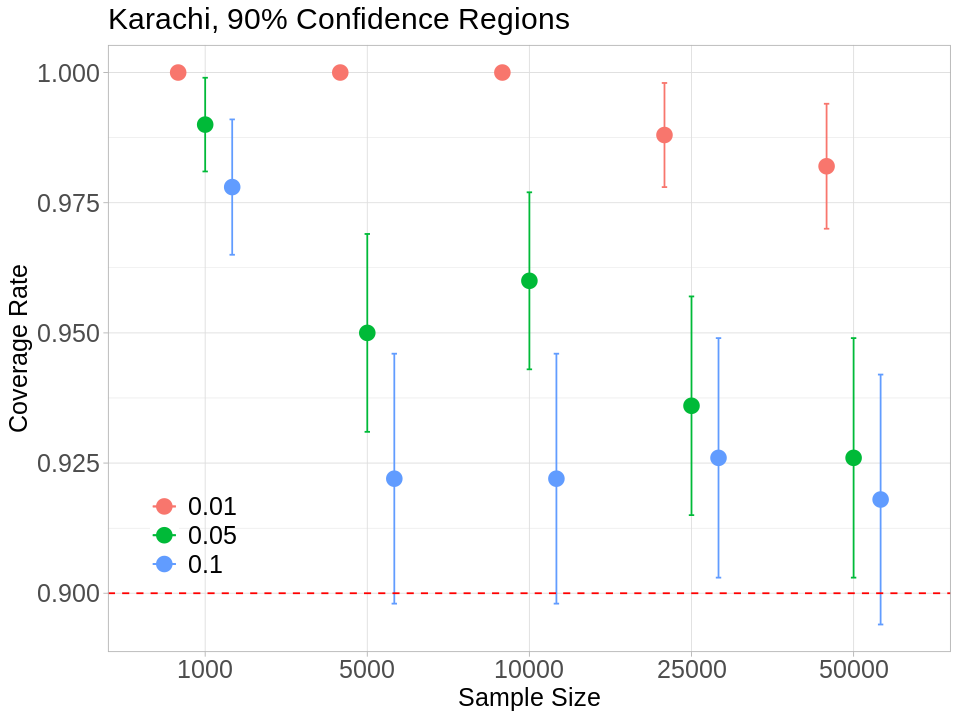

In [38]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [297]:
ind <- 100
path <- paste0('/global/cscratch1/sd/jbbutler/sims/regions/base_confregs_create_tubes/karachi/400x400_on_[50,140]x[0,100]/1000n_500B_400x400_on_[50,140]x[0,100]_karachi_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.05_alpha0.1'
isoline <- drawKarachiIsoline(numCoords=100, gridUbs=c(140,100), gridLbs=c(50,0), prob=0.05)

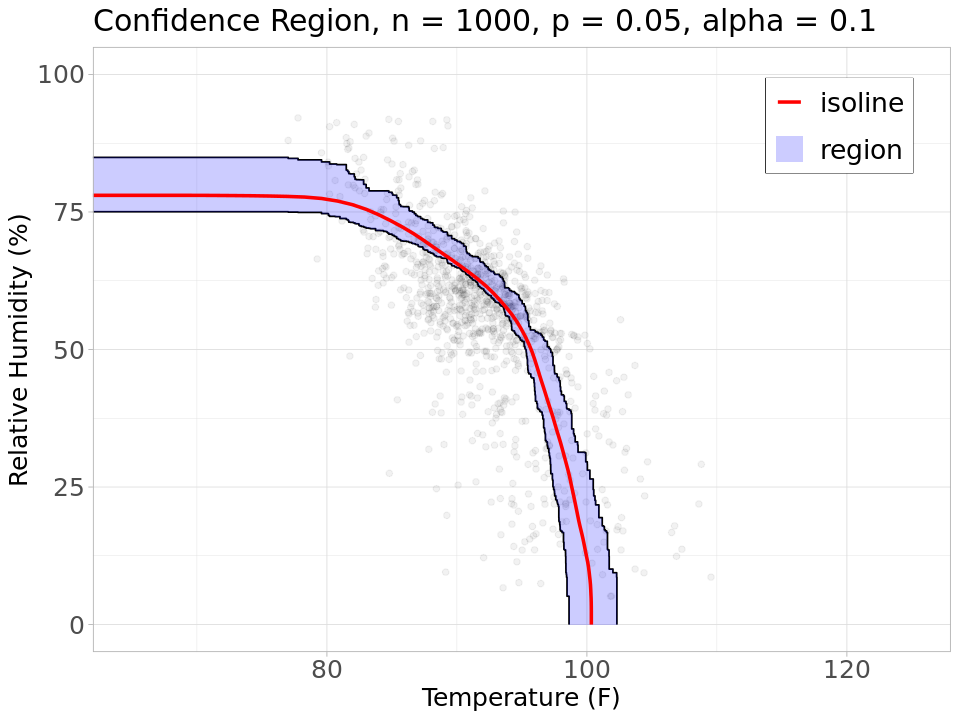

In [298]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
coord_cartesian(ylim=c(0, 100), xlim = c(65, 125)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('Temperature (F)') + ylab('Relative Humidity (%)') + 
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

## 5/19/23

### Projecting to $0.005$

In [13]:
path <- '/global/cscratch1/sd/jbbutler/sims/regions/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.005/isolinenumCoords_500.RData'
res <- readRDS(path)

res <- res %>% 
group_by(n, alpha, base_p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty


Warning message in gzfile(file, "rb"):
“cannot open compressed file '/global/cscratch1/sd/jbbutler/sims/regions/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.005/isolinenumCoords_500.RData', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


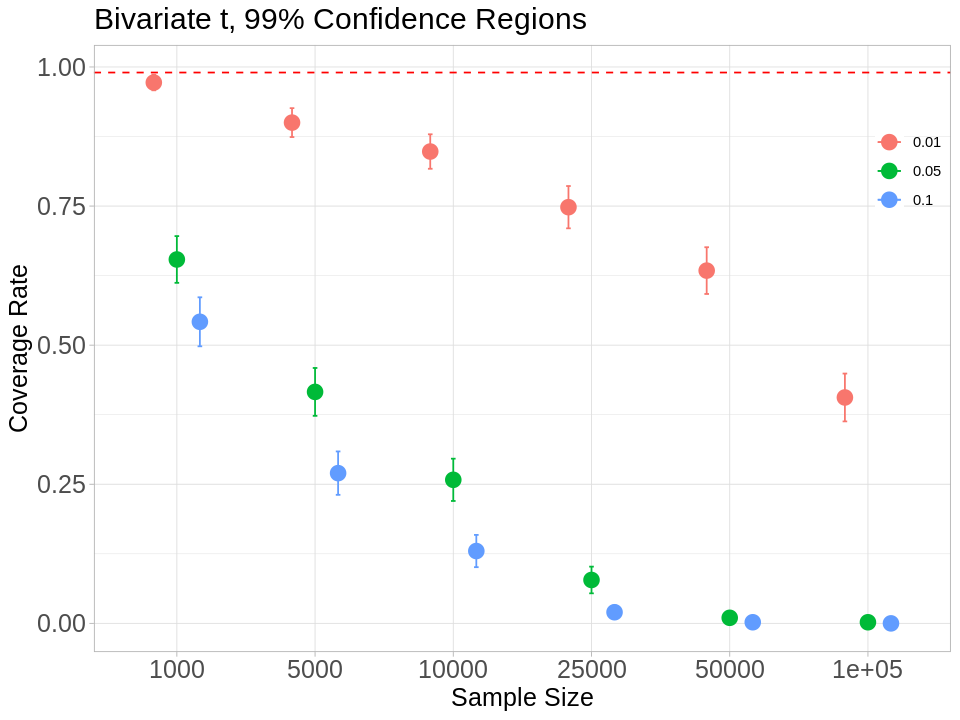

In [12]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.80), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


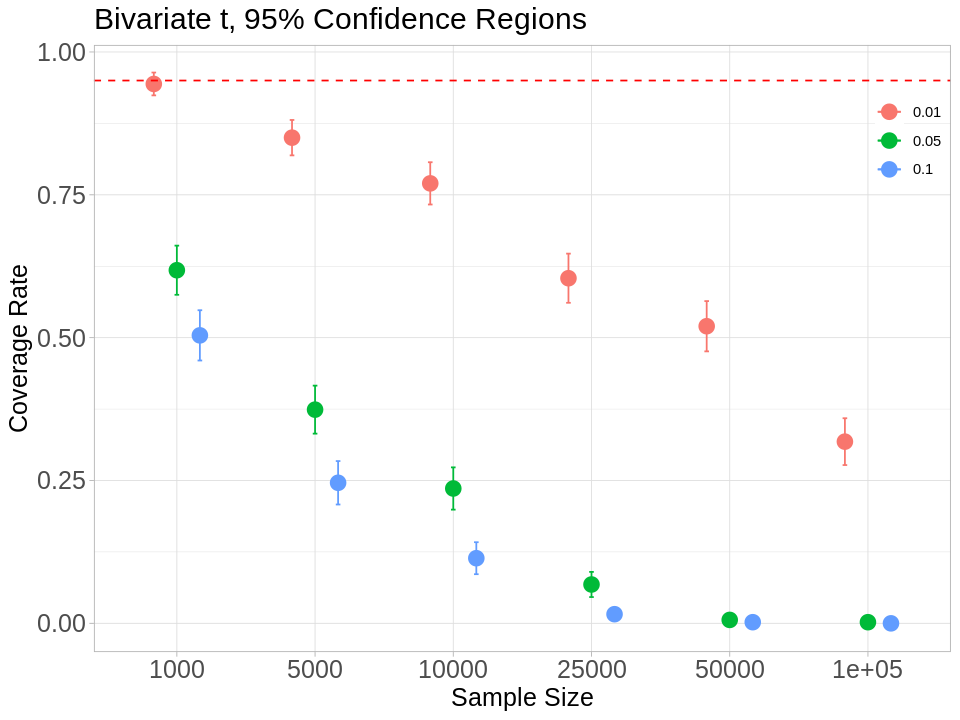

In [14]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



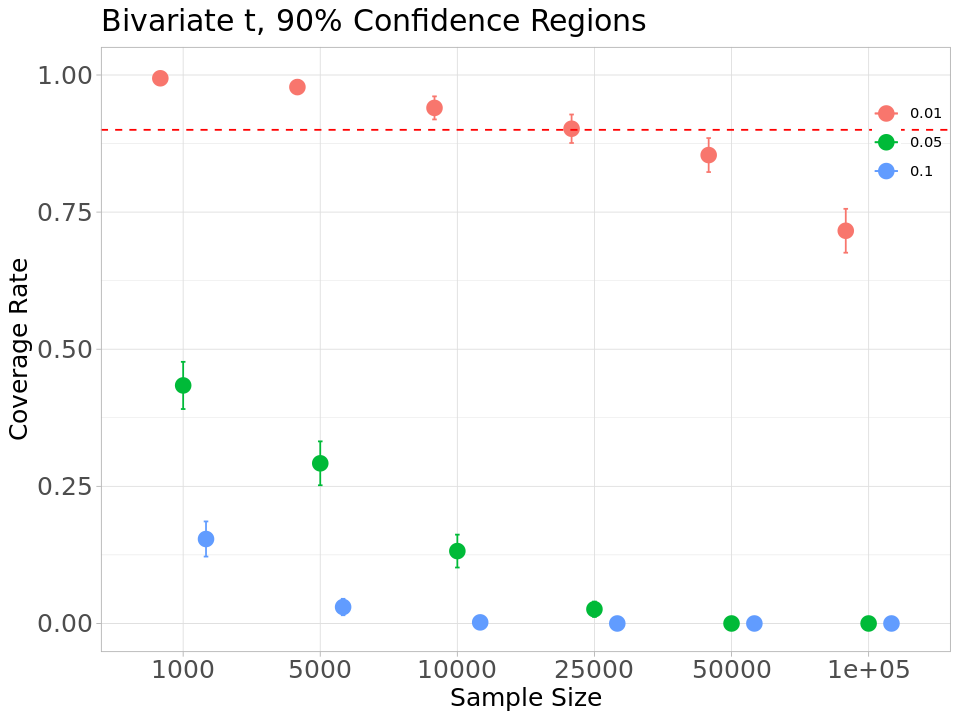

In [377]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

Rule of thumb: if you have more data, go further out in the tail first?

### Projecting to $0.001$

In [2]:
path <- paste0(perlpath, '/sims/regions/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/isolinenumCoords_500.RData')
res <- readRDS(path)

res <- res %>% 
group_by(n, alpha, base_p, beta_func) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'base_p'. You can override
using the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


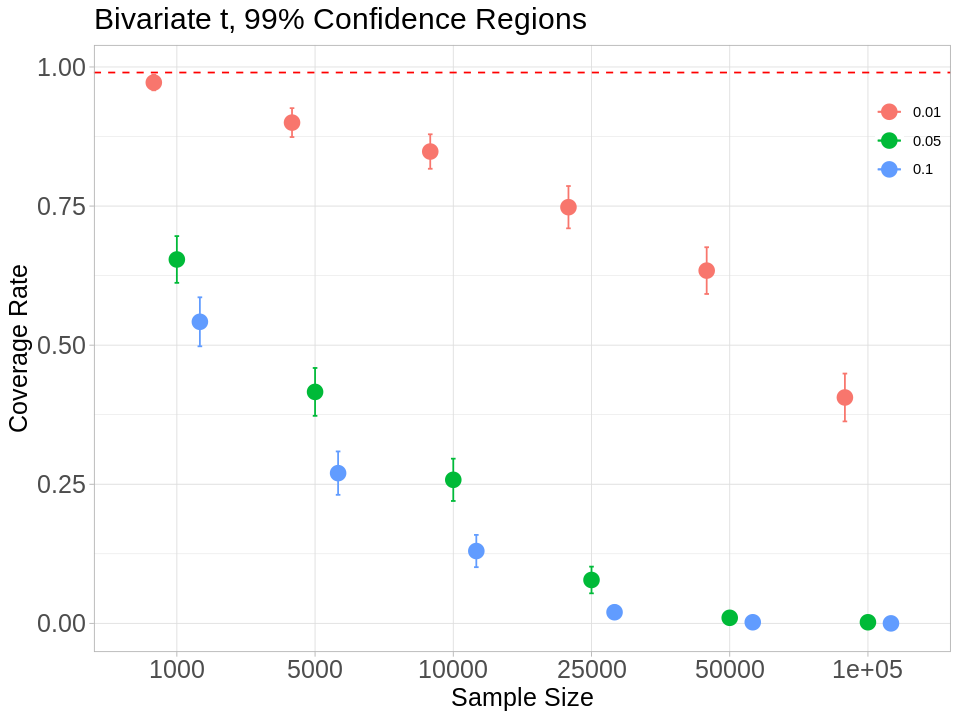

In [3]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.01
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))



geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



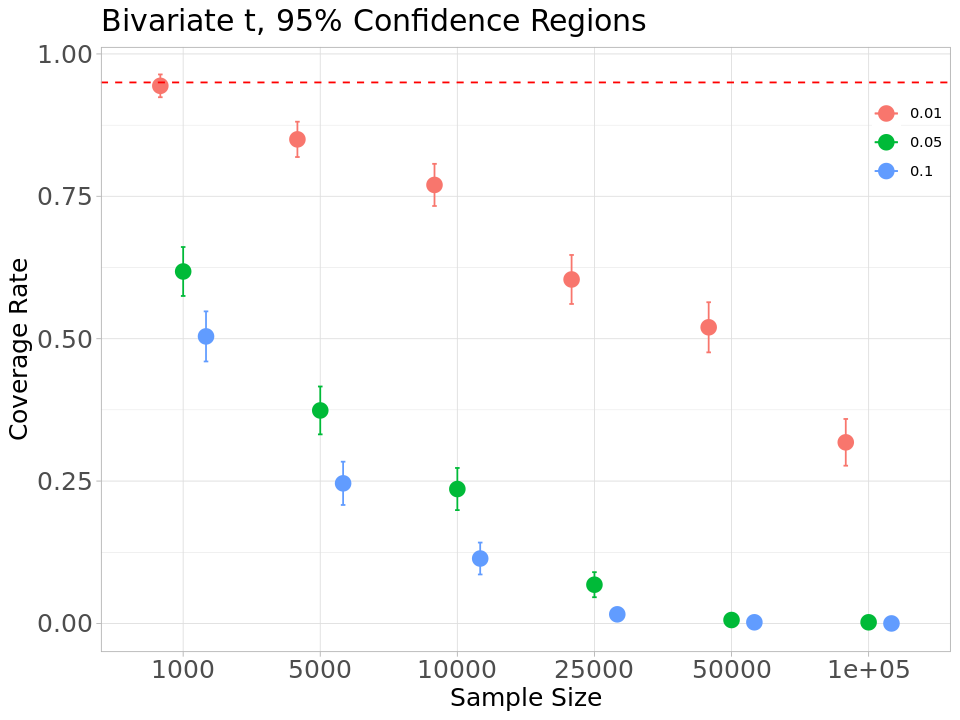

In [392]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



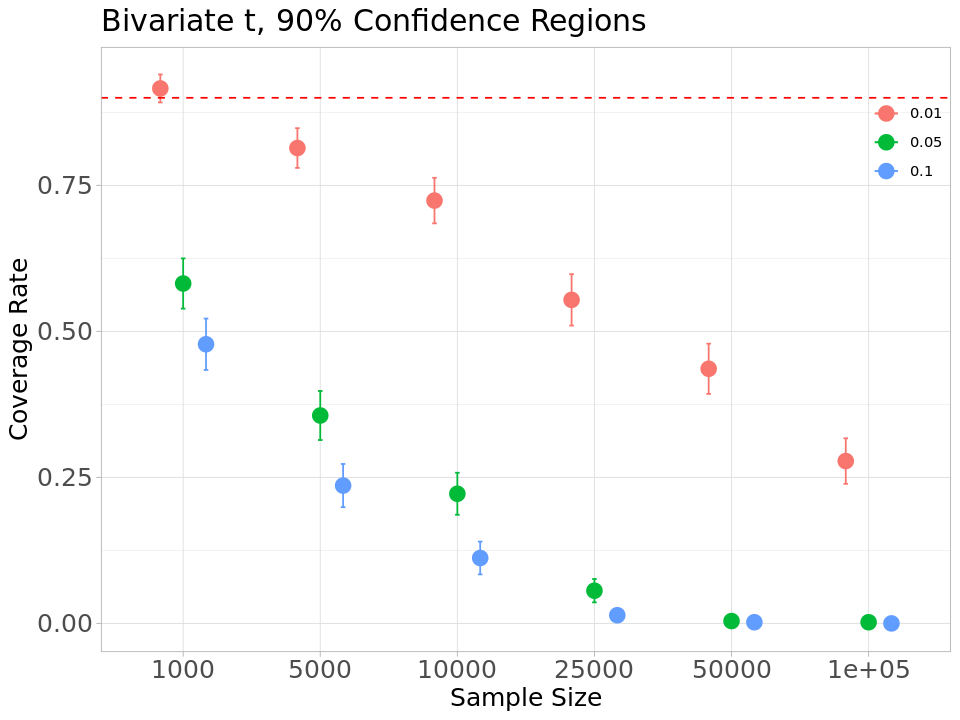

In [393]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.1
ggplot(res %>% filter(alpha==a), aes(color=as.factor(base_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(base_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

## 6/15/23

According to Cooley et al (2014), it seems like our projection method actually should be working, assuming the assumptions in the paper are met (that upon marginal transformation, we have a regularly varying RV with index of regular variation of $\xi = 1$, and that the sample size is large enough so that the limiting measure is kicking in). Assuming these two things, and that we have confidence regions with at least $1-\alpha$ coverage (which we already have), then projecting the confidence regions should give $1-\alpha$ confidence regions for the isoline further out in the tail.

So, unless I'm missing something theoretically or there's a bug in my code, either one of the above assumptions is not holding as we think it is. To isolate which assumption, I will run the projection method without doing the marginal transformation on bivariate t data, since we know it is already RV with index $\xi = 1/4$. This will allow us to run the projection method without relying on the first assumption, so the only real assumption we are testing is that the sample size is large enough.

Let's check it out!

First, to get some intuition, lets see if the projection method on the true $p$ isoline gives us the true $q$ isoline for a bivariate t distribution. My guess is it should, since it is regularly varying with a known index, the sample size is large enough (where does the sample size come in???), and when using the true $p$ isoline, the exceedance probability is exactly $p$ so the resulting point will have exceedance probability of exactly $q$.

In [1]:
library(ggplot2)
library(SimilarityMeasures)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [247]:
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
p <- 0.005
q <- 0.001
p_iso <- drawBivtIsoline(500, c(15,15), c(0,0), p)
q_iso <- drawBivtIsoline(500, c(15,15), c(0,0), q)

In [248]:
proj_q_iso <- p_iso*((p/q)**(1/4))

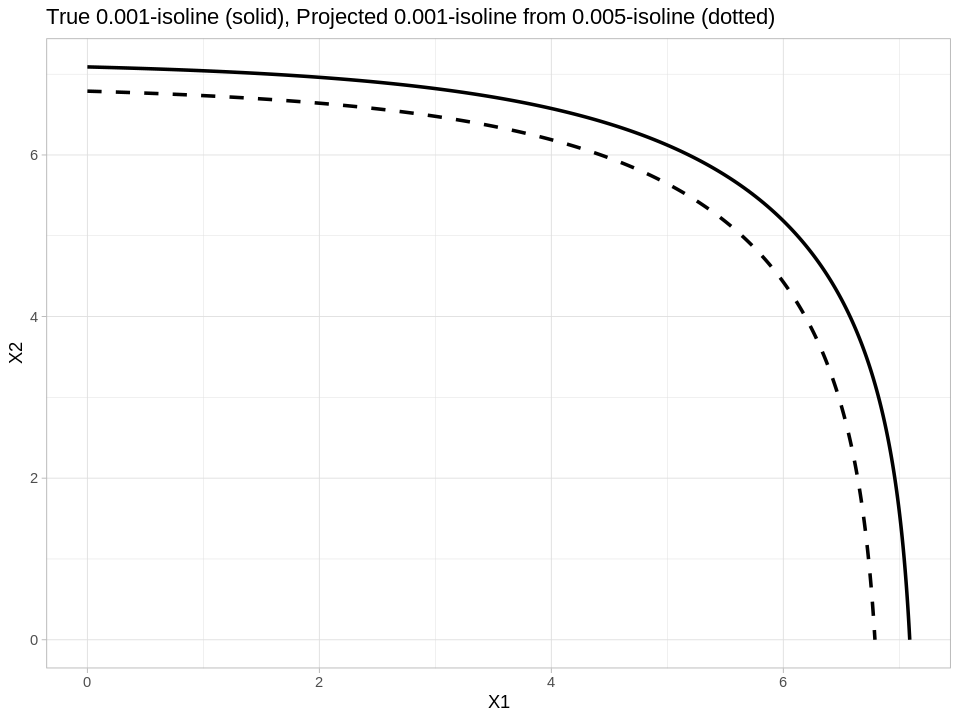

In [249]:
ggplot() + 
geom_line(data=q_iso, aes(x=X1, y=X2), size=1) + 
geom_line(data=proj_q_iso, aes(x=X1, y=X2), size=1, linetype='dashed') + 
ggtitle(paste0('True ', q,'-isoline (solid), Projected ', q,'-isoline from ', p,'-isoline (dotted)')) + 
theme_light()

In [ ]:
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
p <- 0.01
q <- 0.001
p_iso <- drawBivtIsoline(500, c(15,15), c(0,0), p)
q_iso <- drawBivtIsoline(500, c(15,15), c(0,0), q)

In [ ]:
proj_q_iso <- p_iso*((p/q)**(1/4))

In [ ]:
ggplot() + 
geom_line(data=q_iso, aes(x=X1, y=X2), size=1) + 
geom_line(data=proj_q_iso, aes(x=X1, y=X2), size=1, linetype='dashed') + 
ggtitle(paste0('True ', q,'-isoline (solid), Projected ', q,'-isoline from ', p,'-isoline (dotted)')) + 
theme_light()

Kinda far away from each other..

In [81]:
p <- 0.001
q <- 0.00001
p_iso <- drawBivtIsoline(50, c(20,20), c(0,0), p)
q_iso <- drawBivtIsoline(50, c(20,20), c(0,0), q)

In [82]:
proj_q_iso <- p_iso*((p/q)**(1/4))

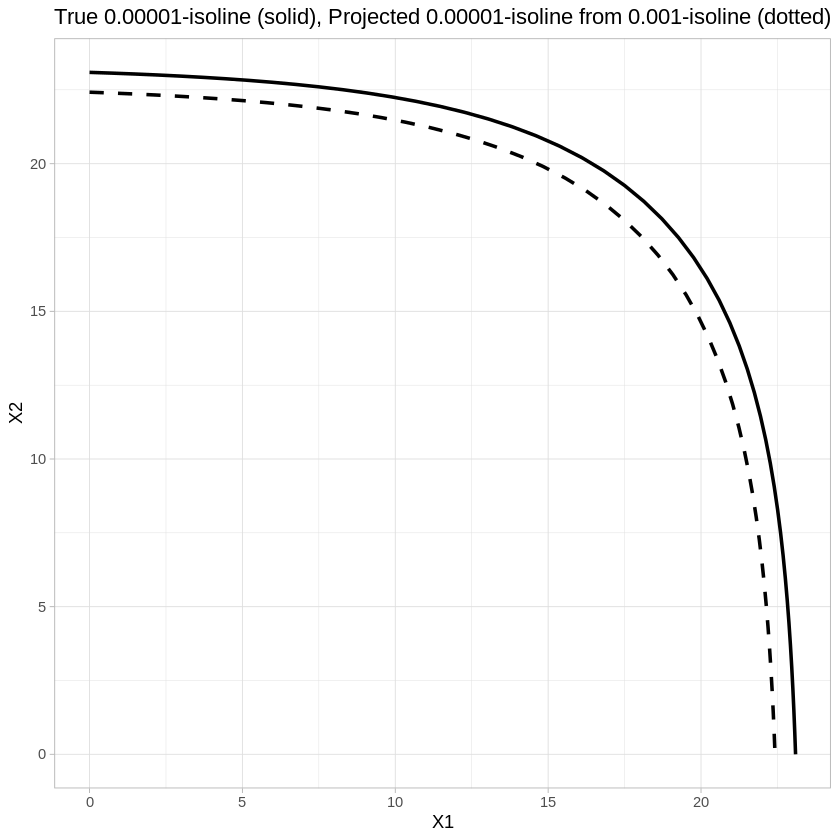

In [83]:
library(ggplot2)
ggplot() + geom_line(data=q_iso, aes(x=X1, y=X2), size=1) + geom_line(data=proj_q_iso, aes(x=X1, y=X2), size=1, linetype='dashed') + ggtitle('True 0.00001-isoline (solid), Projected 0.00001-isoline from 0.001-isoline (dotted)') + theme_light()



Now, they're much closer to each other! So, there's something to be said about this method

I'm going to explore how the isoline recovery improves as a function of starting isoline, using the Frechet distance as a notion of similarity between the projected isoline curve and the true isoline curve.

In [80]:
starting_ps <- c(0.05, 0.01, 0.005, 0.001, 0.0005)
ending_ps <- c(0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001)
test_grid <- expand.grid(p=starting_ps, q=ending_ps)
# remove any pairs for which the starting p is greater than or equal to the ending p
test_grid <- test_grid[test_grid$p > test_grid$q,]

In [85]:
dists <- rep(NA, nrow(test_grid))
for (i in 1:nrow(test_grid)) {
    
    p <- test_grid[i,1]
    q <- test_grid[i,2]
    
    p_iso <- drawBivtIsoline(50, c(20,20), c(0,0), p)
    q_iso <- drawBivtIsoline(50, c(20,20), c(0,0), q)
    proj_q_iso <- p_iso*((p/q)**(1/4))
    
    dists[i] <- as.double(Frechet(as.matrix(q_iso), as.matrix(proj_q_iso)))
}

In [108]:
comparisons <- data.frame(p=as.factor(test_grid$p), q=as.factor(test_grid$q), dists=round(dists,3))

Error goes down!

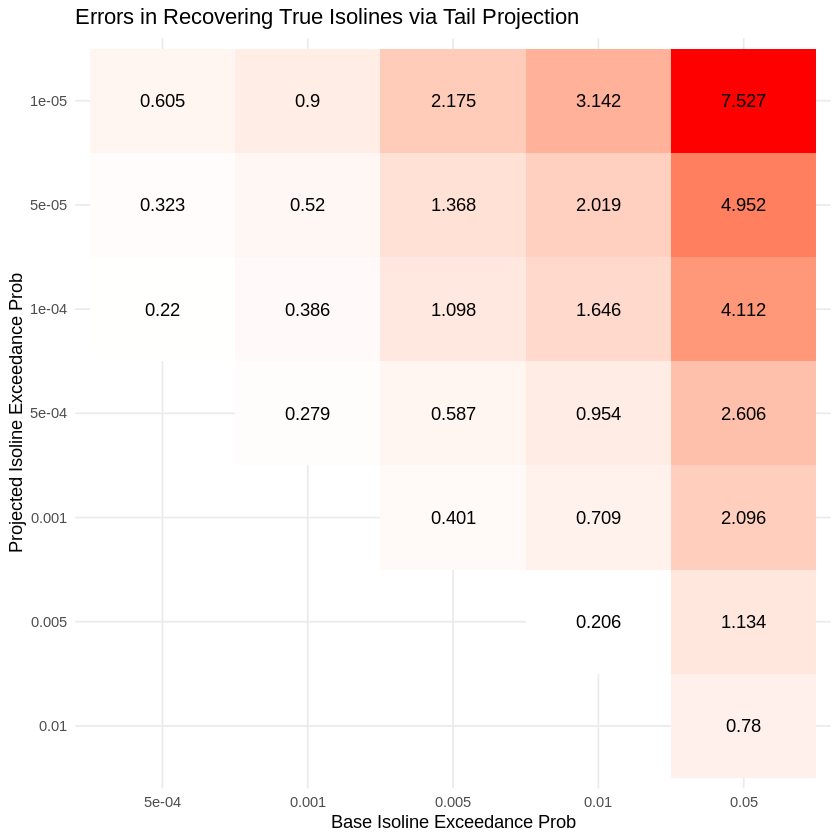

In [118]:
ggplot(comparisons, aes(x = p, y = q)) + 
  geom_tile(aes(fill=dists), show.legend=FALSE) + 
  geom_text(aes(label=dists)) + scale_y_discrete(limits=rev) + 
  scale_fill_gradient(low = "white", high = "red") + 
  ggtitle('Errors in Recovering True Isolines via Tail Projection') +
  xlab('Base Isoline Exceedance Prob') + ylab('Projected Isoline Exceedance Prob') + theme_minimal()

## 6/21/23

To test out the projection method, I'm going to work my way out from simplest cases with the most assumptions to the least assumptions as in Cooley's nonparametric method.

First, we know that if $X$ is bivariate t-distributed as in Cooley, then this variable is regularly varying with index of regular variation $\xi = 1/4$. So, this implies that, assuming we had this knowledge, we should use the scaling relation $s=(p/q)^{1/4}$ on our original isolines, where $p$ is the base level and $q$ is the level we are projecting to. No marginal transformation is required since the variable is already regularly varying. However, it might not be that scaling the true $p$ isoline by $s$ yields the true $q$ isoline (or even close to it) just yet, as seen in the explorations in the previous day's entry. So, we shouldn't expect our projected region to cover the true $q$ isoline. However, it should cover the scaled $p$ isoline, so as a sanity check, we will see if the $1-\alpha$ coverage properties are preserved under this scaling. Then, $1-\alpha$ coverage of the $q$ isoline will depend on how and when the scaled $p$ isoline converges to the $q$ isoline.

In [9]:
path <- '/pscratch/sd/j/jbbutler/sims/regions/projection_exps/bivt_regvar/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/isolinenumCoords_500.RData'
# loading the dataframe of results
bivt_res <- readRDS(path)
bivt_res$n <- as.integer(bivt_res$n)

res <- bivt_res %>% 
group_by(n, alpha, base_p, beta_func) %>% 
summarize(covrate=mean(covered))


`summarise()` has grouped output by 'n', 'alpha', 'base_p'. You can override
using the `.groups` argument.


In [39]:
ind <- 20
path <- paste0('/pscratch/sd/j/jbbutler/sims/regions/projection_exps/bivt_regvar/proj_confregs_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/10000n_500B_400x400_on_[-2,5]x[-2,5]_bivt_empirical/simulation_', ind,'.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.1_alpha0.05'
isoline <- drawBivtIsoline(numCoords=500, gridUbs=c(10,10), gridLbs=c(-2,-2), prob=0.1)*((0.1/0.001)**(1/4))

Warning message:
“Removed 116 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 140 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 238 rows containing missing values (`geom_line()`).”


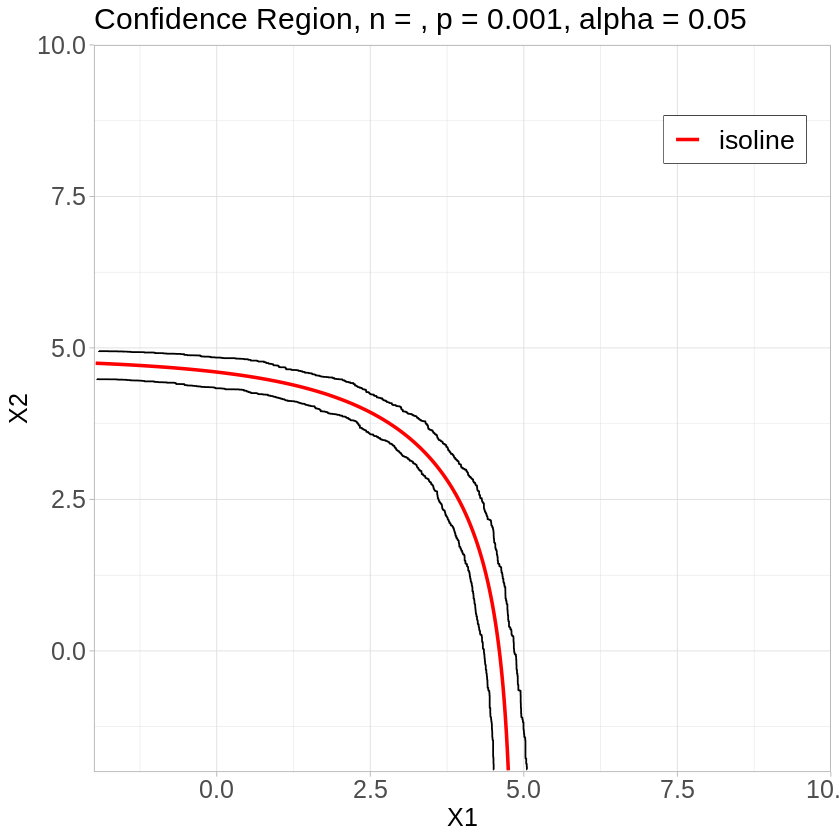

In [41]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
scale_x_continuous(limits = c(-2,10), expand = c(0, 0)) +
scale_y_continuous(limits = c(-2,10), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [43]:
path <- '/pscratch/sd/j/jbbutler/sims/regions/projection_exps/bivt_regvar/proj_coverage_create_tubes/bivt/400x400_on_[-2,5]x[-2,5]/projectingto_0.001/isolinenumCoords_500.RData'
res <- readRDS(path)

In [50]:
res %>% filter(beta_func==0.5, base_p==0.05) %>% group_by(n, alpha) %>% summarize(covrate=mean(covered))

`summarise()` has grouped output by 'n'. You can override using the `.groups`
argument.


n      alpha covrate
1    1000 0.01  0.998  
2    1000 0.05  0.996  
3    1000 0.10  0.988  
4    5000 0.01  0.998  
5    5000 0.05  0.986  
6    5000 0.10  0.976  
7   10000 0.01  1.000  
8   10000 0.05  0.988  
9   10000 0.10  0.962  
10  25000 0.01  0.994  
11  25000 0.05  0.966  
12  25000 0.10  0.940  
13  50000 0.01  0.990  
14  50000 0.05  0.968  
15  50000 0.10  0.936  
16 100000 0.01  0.990  
17 100000 0.05  0.960  
18 100000 0.10  0.924

It seems like $1-\alpha$ coverage is still preserved, which is good! This should have been the case anyway because for any $c \in \mathbb{R}$, $A \subset B \iff cA \subset cB$, so the coverage events are equivalent.

## 7/13/23

Noticing what's happening above with how/when the projection method best works, we will run simulations for $\beta(n) = 1/\sqrt{n}$ for $p=0.005$, $p=0.001$, and $p=0.0001$. We think this will be useful because it will allow us to see when/how the projection method works in the best case scenario when we know exactly what the regular variation scaling of the problem is, and give us a sense of the bias variance tradeoff inherent in this problem. (tubes for these experiments are stored in `bivt_projexp` for projection experiment)

We will first show what some of these extreme tubes look like, to get a sense of the variance.

In [62]:
ind <- 10
path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/50000n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- 'beta0.5_p0.005_alpha0.05'
isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(15,15), gridLbs=c(0,0), prob=0.005)

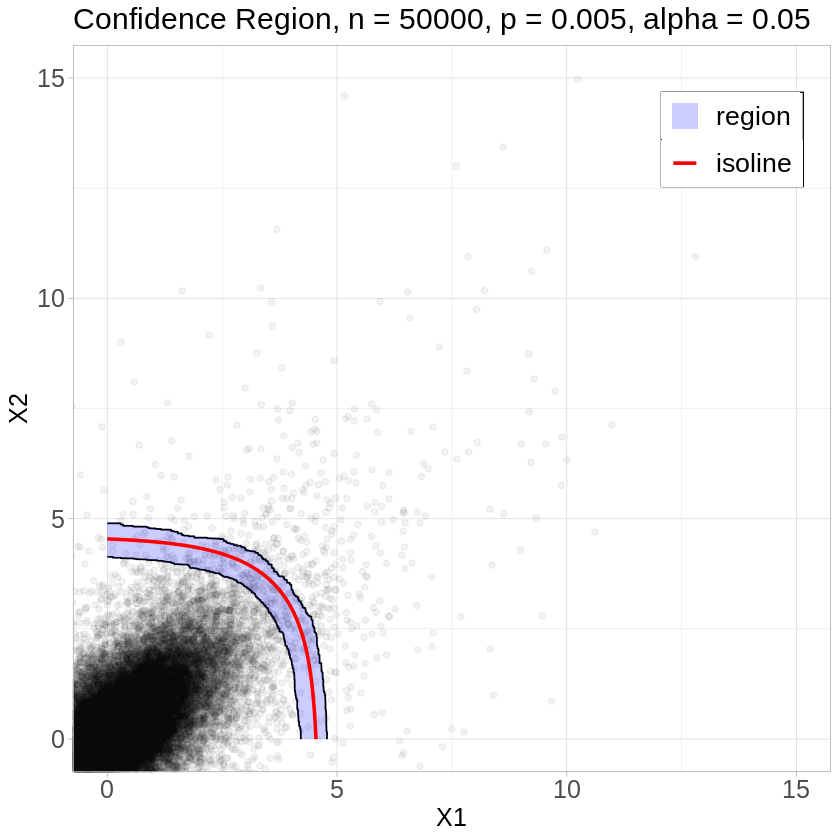

In [63]:
polygon <- rbind(confregs[[confreg_lab]][[1]], 
                 data.frame(t(rev(data.frame(t(confregs[[confreg_lab]][[2]]))))))
n <- nrow(confregs[[confreg_lab]]$data)
p <- confregs[[confreg_lab]]$p
alpha <- confregs[[confreg_lab]]$alpha

ggplot() + geom_point(data=confregs[[confreg_lab]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=confregs[[confreg_lab]][[1]], aes(x=X1, y=X2)) +
geom_line(data=confregs[[confreg_lab]][[2]], aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
coord_cartesian(ylim=c(0, 15), xlim = c(0, 15)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', p = ', p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

Definitely can see the bias variance tradeoff starting to come into focus! Some regions are unbounded up and to the right because we are using the empirical survival function, and the empirical survival function does a much worse job of estimating the survival function that far out. There might even be an issue with the bootstrap? Anyway, you can see a lot of variance here. Now, we will take each of these regions and project using the known scaling relation with the bivariate t distribution.

We will carry out the following projections.

+ From $p = 0.005$, we will project to $p = 0.001, 0.0001$.
+ From $p = 0.001$, we will project to $p = 0.0001, 0.00001$.
+ From $p = 0.0001$, we will project to $p = 0.00001, 0.000001$.

Play around in the following cell for some results!

In [217]:
sim_res_path <- '/pscratch/sd/j/jbbutler/sims/regions/bivt_projexp/proj_tubes_results/isolinenumCoords_500.RData'
tab_res <- readRDS(sim_res_path)
tab_res %>% filter(alpha==0.05) %>% group_by(n, base_p, proj_p) %>% summarize(covrate=mean(covered)) %>% filter(base_p == 0.005)


`summarise()` has grouped output by 'n', 'base_p'. You can override using the
`.groups` argument.


n     base_p proj_p covrate
1 1e+03 0.005  1e-04  1.000  
2 1e+03 0.005  1e-03  1.000  
3 1e+04 0.005  1e-04  1.000  
4 1e+04 0.005  1e-03  1.000  
5 5e+04 0.005  1e-04  0.220  
6 5e+04 0.005  1e-03  0.738  
7 1e+05 0.005  1e-04  0.000  
8 1e+05 0.005  1e-03  0.154

Coverage results!

In [233]:
sim_res_path <- '/pscratch/sd/j/jbbutler/sims/regions/bivt_projexp/proj_tubes_results/isolinenumCoords_500.RData'
res <- readRDS(sim_res_path)

res <- res %>% 
group_by(n, alpha, base_p, beta_func, proj_p) %>% 
summarize(covrate=mean(covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'alpha', 'base_p', 'beta_func'. You
can override using the `.groups` argument.


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


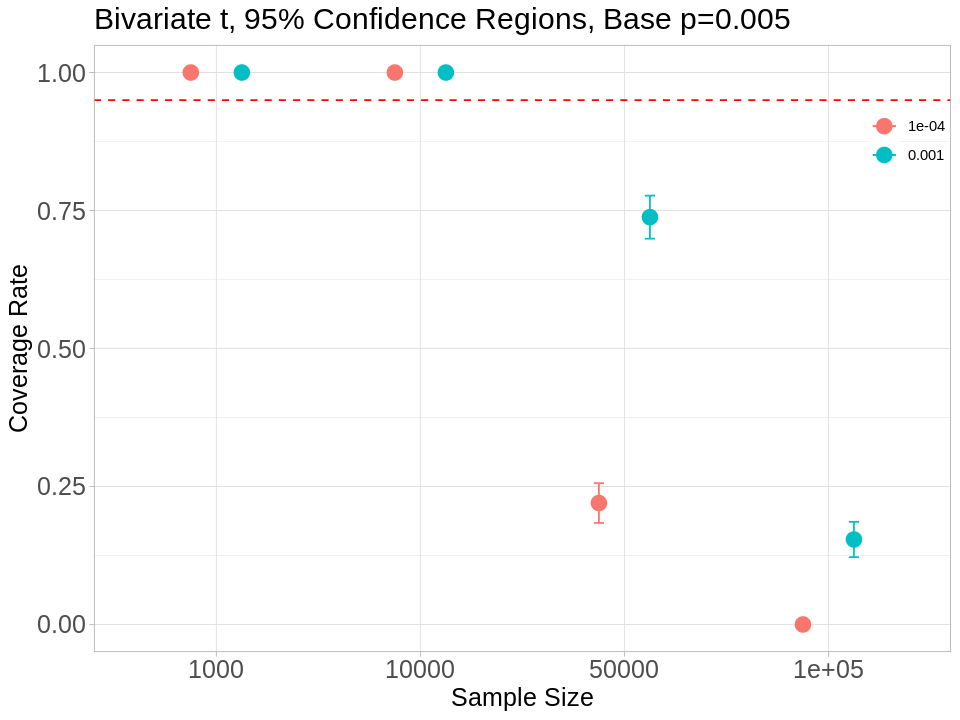

In [250]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
bp <- 0.005
ggplot(res %>% filter(alpha==a, base_p==bp), aes(color=as.factor(proj_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(proj_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions, Base p=', bp)) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


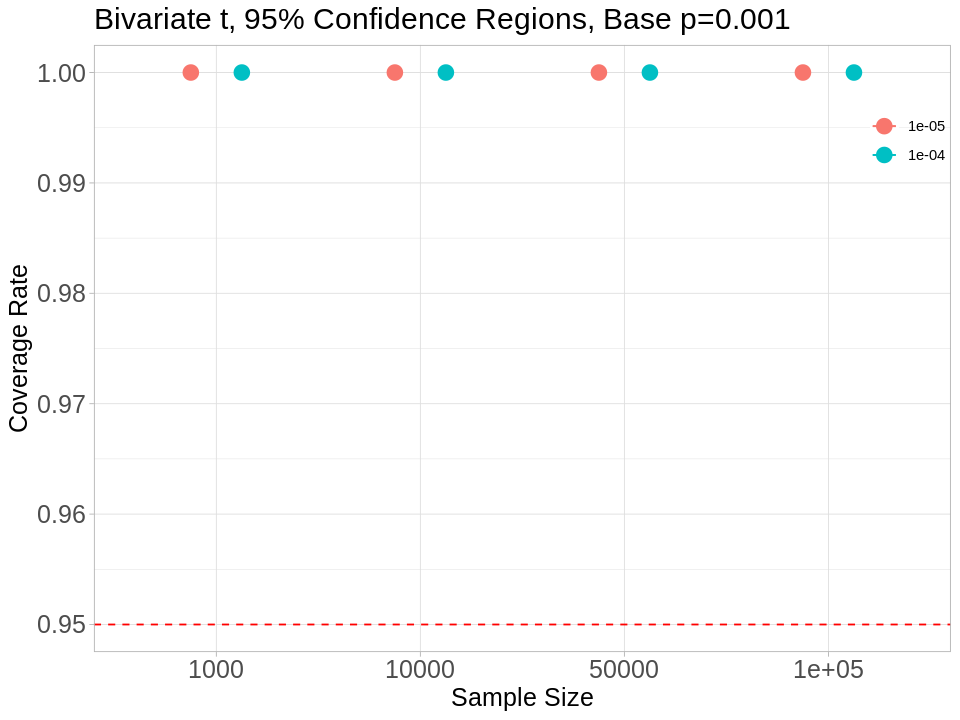

In [251]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
bp <- 0.001
ggplot(res %>% filter(alpha==a, base_p==bp), aes(color=as.factor(proj_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(proj_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions')) +
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions, Base p=', bp)) +
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


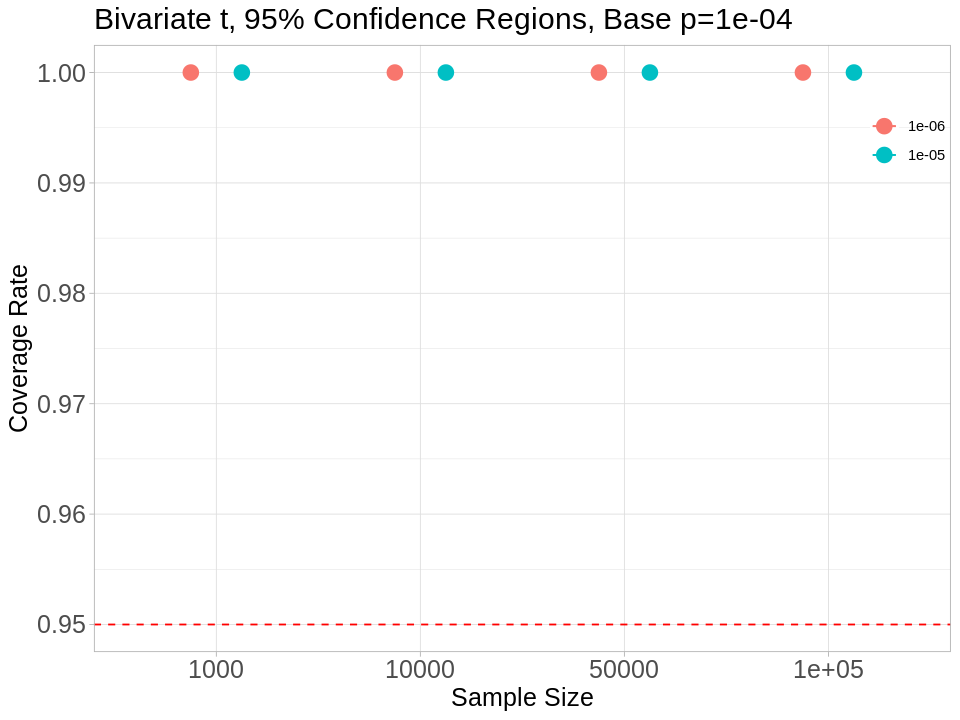

In [252]:
options(repr.plot.width=8, repr.plot.height=6)
a <- 0.05
bp <- 0.0001
ggplot(res %>% filter(alpha==a, base_p==bp), aes(color=as.factor(proj_p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(proj_p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Regions, Base p=', bp)) + 
theme(legend.title=element_blank(), legend.position=c(0.95,0.85), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18))

Looking at some smaller examples of successful (and failed) covers.

In [306]:
ind <- 10
n <- 10000
base_p <- 0.005
proj_p <- 1e-4
alpha <- 0.05
path <- paste0(perlpath, '/sims/regions/bivt_projexp/proj_tubes/bivt/400x400_on_[0,15]x[0,15]/', n,'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- paste0('beta0.5_p', base_p,'_alpha0.05')
true_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(15,15), gridLbs=c(0,0), prob=proj_p)
base_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(15,15), gridLbs=c(0,0), prob=base_p)
fake_isoline <- base_isoline*((base_p/proj_p)**(1/4))

Warning message:
“Removed 6261 rows containing missing values (`geom_point()`).”


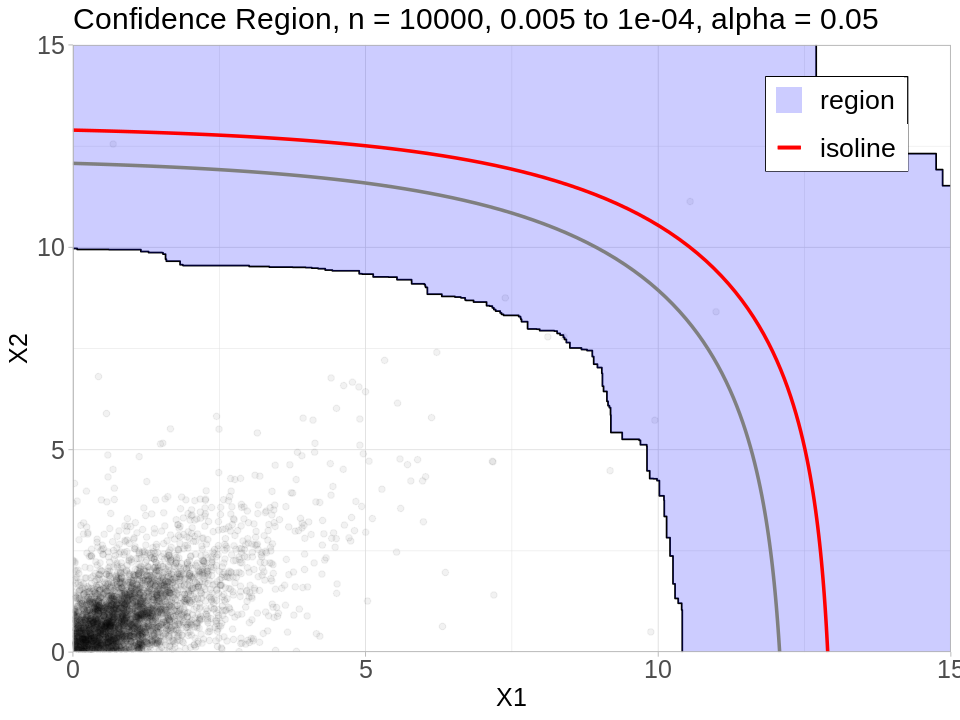

In [311]:
base_path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/', n, 'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
base_info <- readRDS(base_path)

tube_top <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[1]]
tube_bottom <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[2]]
polygon <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

ggplot() + geom_point(data=base_info[[1]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=true_isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
geom_line(data=fake_isoline, aes(x=X1, y=X2, color='fake isoline'), size=1) +
coord_cartesian(ylim=c(0, 15), xlim = c(0, 15)) +
scale_x_continuous(limits = c(0,20), expand = c(0, 0)) +
scale_y_continuous(limits = c(0,20), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', ', base_p, ' to ', proj_p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [325]:
ind <- 10
n <- 50000
base_p <- 0.005
proj_p <- 1e-4
alpha <- 0.05
path <- paste0(perlpath, '/sims/regions/bivt_projexp/proj_tubes/bivt/400x400_on_[0,15]x[0,15]/', n,'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- paste0('beta0.5_p', base_p,'_alpha0.05')
true_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(15,15), gridLbs=c(0,0), prob=proj_p)
base_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(15,15), gridLbs=c(0,0), prob=base_p)
fake_isoline <- base_isoline*((base_p/proj_p)**(1/4))

Warning message:
“Removed 31581 rows containing missing values (`geom_point()`).”


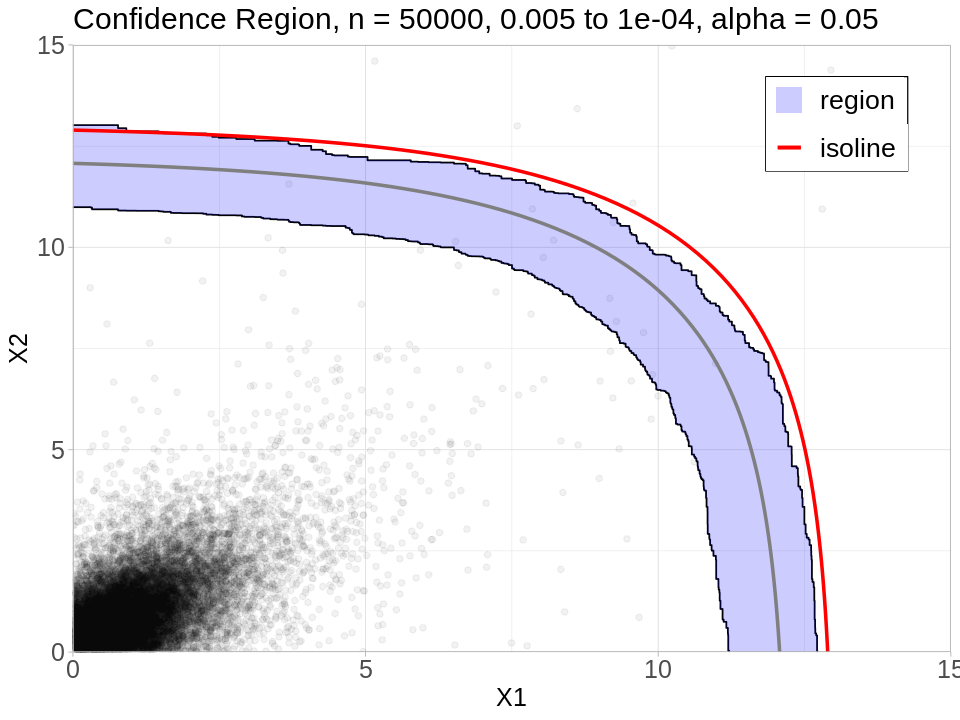

In [326]:
base_path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/', n, 'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
base_info <- readRDS(base_path)

tube_top <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[1]]
tube_bottom <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[2]]
polygon <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

ggplot() + geom_point(data=base_info[[1]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=true_isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
geom_line(data=fake_isoline, aes(x=X1, y=X2, color='fake isoline'), size=1) +
coord_cartesian(ylim=c(0, 15), xlim = c(0, 15)) +
scale_x_continuous(limits = c(0,20), expand = c(0, 0)) +
scale_y_continuous(limits = c(0,20), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', ', base_p, ' to ', proj_p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [343]:
ind <- 10
n <- 50000
base_p <- 0.001
proj_p <- 1e-4
alpha <- 0.05
path <- paste0(perlpath, '/sims/regions/bivt_projexp/proj_tubes/bivt/400x400_on_[0,15]x[0,15]/', n,'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- paste0('beta0.5_p', base_p,'_alpha0.05')
true_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(20,20), gridLbs=c(0,0), prob=proj_p)
base_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(20,20), gridLbs=c(0,0), prob=base_p)
fake_isoline <- base_isoline*((base_p/proj_p)**(1/4))

Warning message:
“Removed 31581 rows containing missing values (`geom_point()`).”


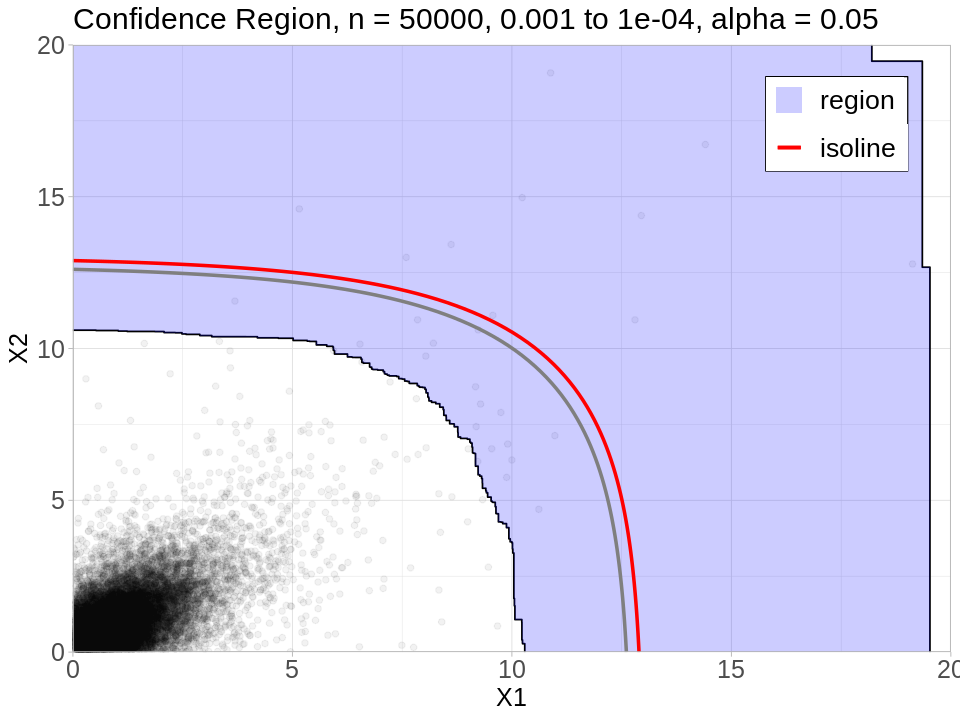

In [344]:
base_path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/', n, 'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
base_info <- readRDS(base_path)

tube_top <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[1]]
tube_bottom <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[2]]
polygon <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

ggplot() + geom_point(data=base_info[[1]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=true_isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
geom_line(data=fake_isoline, aes(x=X1, y=X2, color='fake isoline'), size=1) +
coord_cartesian(ylim=c(0, 20), xlim = c(0, 20)) +
scale_x_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_y_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', ', base_p, ' to ', proj_p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [345]:
ind <- 10
n <- 50000
base_p <- 1e-4
proj_p <- 1e-5
alpha <- 0.05
path <- paste0(perlpath, '/sims/regions/bivt_projexp/proj_tubes/bivt/400x400_on_[0,15]x[0,15]/', n,'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- paste0('beta0.5_p', base_p,'_alpha0.05')
true_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(20,20), gridLbs=c(0,0), prob=proj_p)
base_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(20,20), gridLbs=c(0,0), prob=base_p)
fake_isoline <- base_isoline*((base_p/proj_p)**(1/4))

Warning message:
“Removed 31581 rows containing missing values (`geom_point()`).”


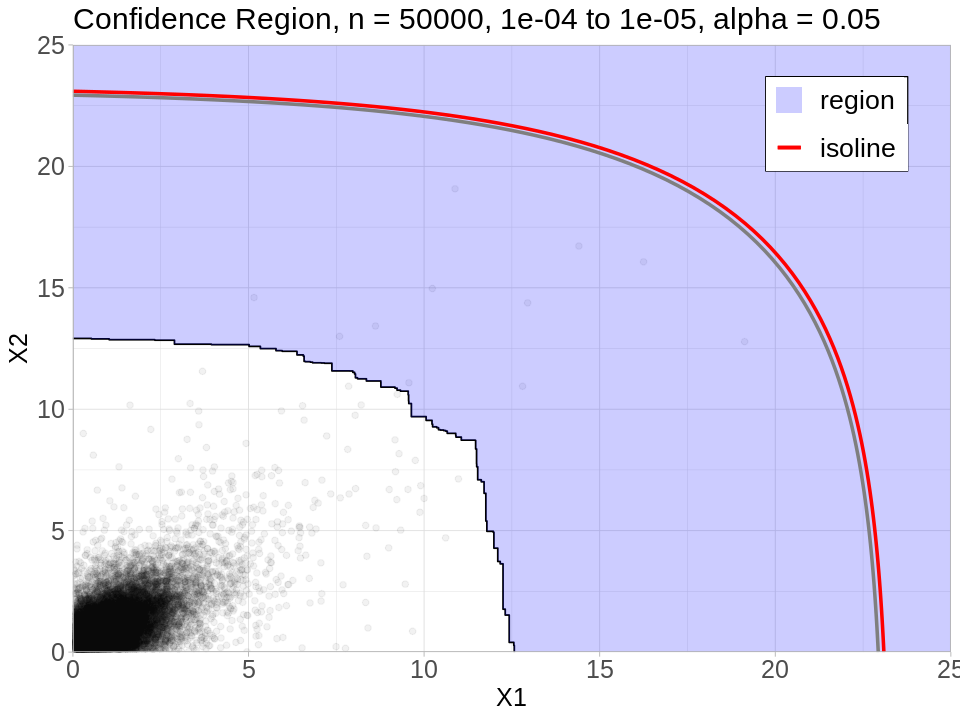

In [348]:
base_path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/', n, 'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
base_info <- readRDS(base_path)

tube_top <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[1]]
tube_bottom <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[2]]
polygon <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

ggplot() + geom_point(data=base_info[[1]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=true_isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
geom_line(data=fake_isoline, aes(x=X1, y=X2, color='fake isoline'), size=1) +
coord_cartesian(ylim=c(0, 25), xlim = c(0, 25)) +
scale_x_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_y_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', ', base_p, ' to ', proj_p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))

In [352]:
ind <- 10
n <- 100000
base_p <- 1e-4
proj_p <- 1e-6
alpha <- 0.05
path <- paste0(perlpath, '/sims/regions/bivt_projexp/proj_tubes/bivt/400x400_on_[0,15]x[0,15]/', n,'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
confregs <- readRDS(path)
confreg_lab <- paste0('beta0.5_p', base_p,'_alpha0.05')
true_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(40,40), gridLbs=c(0,0), prob=proj_p)
base_isoline <- drawBivtIsoline(numCoords=100, gridUbs=c(40,40), gridLbs=c(0,0), prob=base_p)
fake_isoline <- base_isoline*((base_p/proj_p)**(1/4))

Warning message:
“Removed 62909 rows containing missing values (`geom_point()`).”


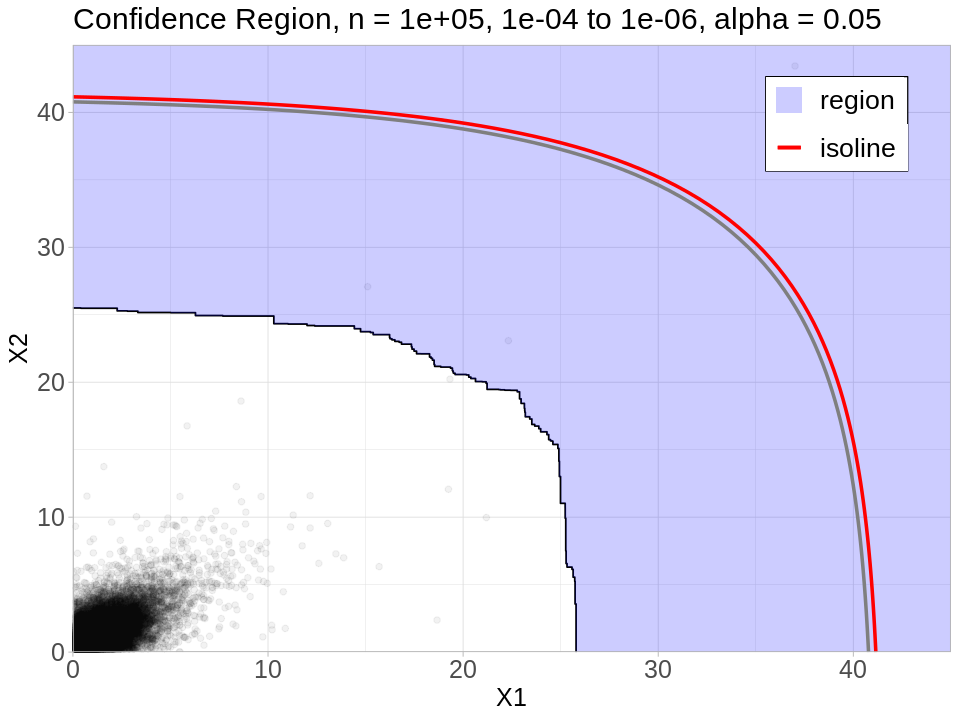

In [355]:
base_path <- paste0(perlpath, '/sims/regions/bivt_projexp/base_tubes/bivt/400x400_on_[0,15]x[0,15]/', n, 'n_500B_400x400_on_[0,15]x[0,15]_bivt_empirical/simulation_', ind, '.RData')
base_info <- readRDS(base_path)

tube_top <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[1]]
tube_bottom <- confregs[[confreg_lab]][['proj_regions']][[paste0('proj_p', proj_p)]][[2]]
polygon <- rbind(tube_top, 
                 data.frame(t(rev(data.frame(t(tube_bottom))))))

ggplot() + geom_point(data=base_info[[1]]$data, aes(x=X1, y=X2), alpha=0.05) + 
geom_line(data=tube_top, aes(x=X1, y=X2)) +
geom_line(data=tube_bottom, aes(x=X1, y=X2)) +
geom_polygon(data=polygon, aes(x=X1, y=X2, fill='region'), alpha=0.2) +
geom_line(data=true_isoline, aes(x=X1, y=X2, color='isoline'), size=1) +
geom_line(data=fake_isoline, aes(x=X1, y=X2, color='fake isoline'), size=1) +
coord_cartesian(ylim=c(0, 45), xlim = c(0, 45)) +
scale_x_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_y_continuous(limits = c(0,50), expand = c(0, 0)) +
scale_fill_manual(values=c('region'='blue')) +
scale_color_manual(values=c('isoline'='red')) +
xlab('X1') + ylab('X2') + 
ggtitle(paste0('Confidence Region, n = ', n, ', ', base_p, ' to ', proj_p, ', alpha = ', alpha)) +
theme_light() +
theme(legend.position = c(0.87, 0.87), 
      legend.title = element_blank(), 
      legend.box.background = element_rect(colour = "black"), 
      axis.title = element_text(size = 15), 
      axis.text = element_text(size = 15), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=18))